In [2]:
import matplotlib.pyplot as plt
import numpy as np



In [3]:
import sqdtoolz as stz

In [4]:
from sqdtoolz.Experiment import Experiment

In [5]:
from sqdtoolz.Utilities.DataFitting import*

In [3]:
7.02e9/4265/1e6

1.6459554513481829

In [2]:
import numpy as np

np.linspace(0, 0.008, 41)

array([0.    , 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.0012, 0.0014,
       0.0016, 0.0018, 0.002 , 0.0022, 0.0024, 0.0026, 0.0028, 0.003 ,
       0.0032, 0.0034, 0.0036, 0.0038, 0.004 , 0.0042, 0.0044, 0.0046,
       0.0048, 0.005 , 0.0052, 0.0054, 0.0056, 0.0058, 0.006 , 0.0062,
       0.0064, 0.0066, 0.0068, 0.007 , 0.0072, 0.0074, 0.0076, 0.0078,
       0.008 ])

# 2D Rabi

In [20]:
 from sqdtoolz.Utilities.FileIO import FileIOReader

leData = FileIOReader(r'Z:/Data/20_10_21_Oxford_quantware_arka21.ipynb/2021-11-21/193047-rabi2D_10dB/data.h5')
arr5 = leData.get_numpy_array()

In [41]:
np.size(leData.param_vals[0][:])
leData.param_vals[:][:]
t_axis = leData.param_vals[0][:]
driv_axis = leData.param_vals[1][:]
np.shape(arr5)

(100, 20, 2)

In [43]:
np.shape(arr5[:,-1,0]**2)

(100,)

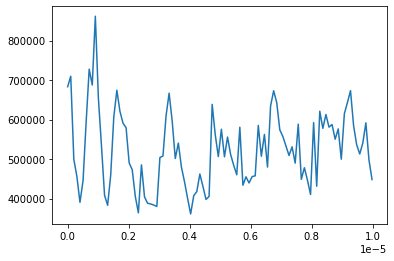

In [50]:
plt.plot(t_axis, arr5[:,-4,0]**2 + arr5[:,-4,1]**2)

{'amplitude': 148.15802840724828,
 'decay_rate': 490975.9587781888,
 'frequency': 1195759.9725174261,
 'phase': -0.062092993032732226,
 'offset': 708.7110147592349,
 'fig': <Figure size 432x288 with 1 Axes>}

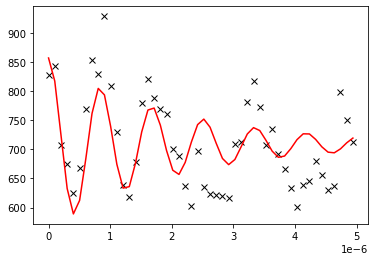

In [58]:
dfit = DFitSinusoid()
fil = 2
filt = 100
t_vals = t_axis[:-50]
amp_vals = np.sqrt(arr5[:,-4,0]**2 + arr5[:,-4,1]**2)[:-50]
timeRabiFit = dfit.get_fitted_plot(t_vals, amp_vals) #np.unwrap(np.arctan2(arr[:,1], arr[:,0]))
timeRabiFit

SyntaxError: invalid syntax (<ipython-input-51-fa3980bc165b>, line 1)

# Typical PSD of weak measurement oscillations "Rabi"

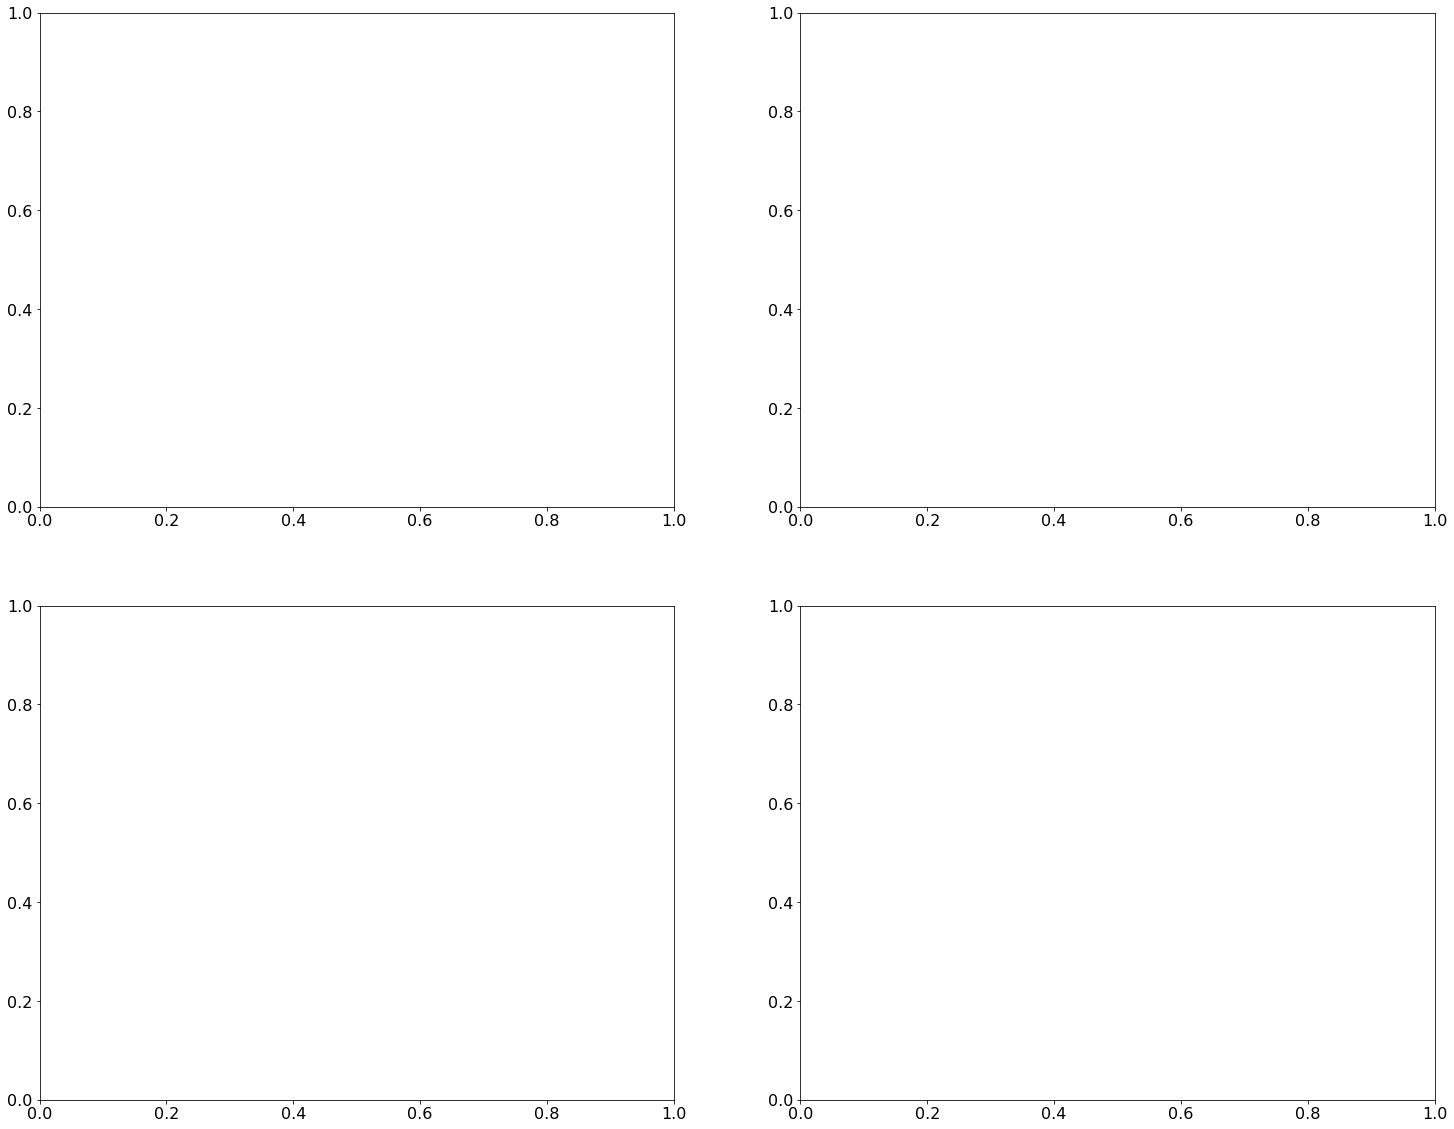

In [103]:
#Prepare subplots
fig4, axs4 = plt.subplots(2, 2)
fig4.set_figwidth(25); fig4.set_figheight(20)

In [104]:
from sqdtoolz.Utilities.FileIO import FileIOReader

leData = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-18\120017-SS_FFT_Data_cav_detu_600e3\data.h5')
arr = leData.get_numpy_array()

In [105]:
leData.param_vals

[array([18, 20, 22, 24, 26]),
 array([0.005, 0.007, 0.009, 0.011]),
 array([    0.        ,  2604.16666667,  5208.33333333, ...,
        -7812.5       , -5208.33333333, -2604.16666667])]

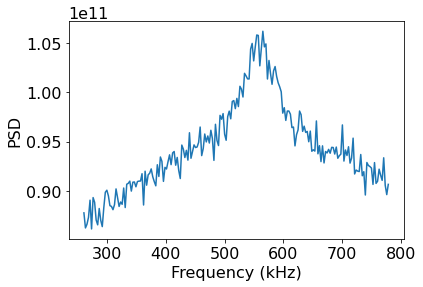

In [106]:
import matplotlib.pyplot as plt

startInd = 100
endInd = 300
plt.plot(leData.param_vals[2][startInd:endInd]/1e3, arr[3][2][startInd:endInd,0])
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD')

axs4[0][0].plot(leData.param_vals[2][startInd:endInd]/1e3, arr[3][2][startInd:endInd,0])
axs4[0][0].set_xlabel('Frequency (kHz)', fontsize = 22)
axs4[0][0].set_ylabel('PSD', fontsize = 22)
# axs4[0][0].legend(['(a)'], fontsize = 22)
axs4[0][0].set_title('(a)   ', fontsize = 28, loc='right', y=1.0, pad=-30)

# Set general font size
plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (axs4[0][0].get_xticklabels() + axs4[0][0].get_yticklabels()):
	label.set_fontsize(16)

# Set axis width
for side in axs4[0][0].spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs4[0][0].spines[side].set_linewidth(3)


In [107]:
import numpy as np
from sqdtoolz.Utilities.DataFitting import*

cur_proc = arr[3][2][startInd:endInd,0]
freq_vals = leData.param_vals[2][startInd:endInd]/1e3


#Run polynomial subtraction
poly_deg = 2
x_vals = np.arange(cur_proc.size)
p = np.poly1d(np.polyfit(x_vals, cur_proc, poly_deg ))
cur_proc = cur_proc - p(x_vals)
#

#Fit the peak
dfit = DFitPeakLorentzian()
dpkt = dfit.get_fitted_plot(freq_vals, cur_proc, dontplot=True)
freq_val = dpkt['centre'] / 1e3
dpkt

{'amplitude': 8415267035.008199,
 'width': 40.15283354686347,
 'centre': 559.8380286994217,
 'offset': -967944138.6473887,
 'fig': None}

# time domain trace

In [108]:
from sqdtoolz.Utilities.FileIO import FileIOReader

leData = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-18\100836-SS_LTS_Data\data.h5')
arr = leData.get_numpy_array()

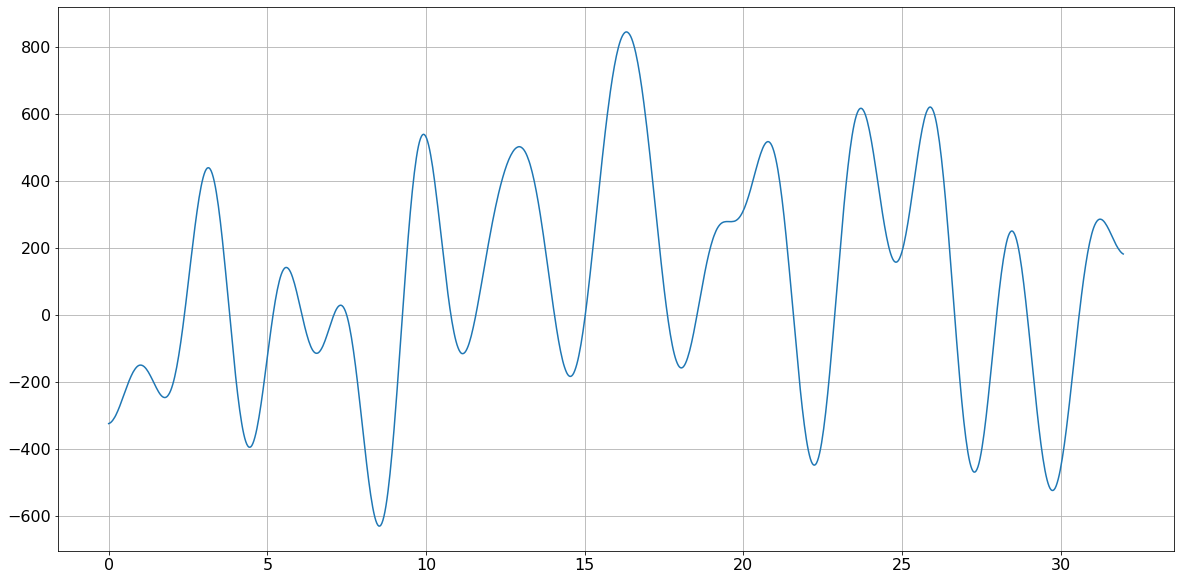

In [109]:
rawData = arr[:,0]+1j*arr[:,1]
fig, ax = plt.subplots(1)
fig.set_figwidth(20); fig.set_figheight(10)
endInd = 1000
ax.plot(np.arange(rawData[:endInd].size)/31250000 * 1e6, np.real(rawData[:endInd]))
ax.grid()

axs4[0][1].plot(np.arange(rawData[:endInd].size)/31250000 * 1e6, np.real(rawData[:endInd]))
axs4[0][1].set_xlabel('Time (micro-second)', fontsize = 22)
axs4[0][1].set_ylabel('Amplitude ', fontsize = 22)
# axs4[0][1].legend(['(b)'], fontsize = 22)
axs4[0][1].set_title('(b)   ', fontsize = 28, loc='right', y=1.0, pad=-30)

# Set general font size
plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (axs4[0][1].get_xticklabels() + axs4[0][1].get_yticklabels()):
	label.set_fontsize(16)

# Set axis width
for side in axs4[0][1].spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs4[0][1].spines[side].set_linewidth(3)



### PSD of the single time trace above

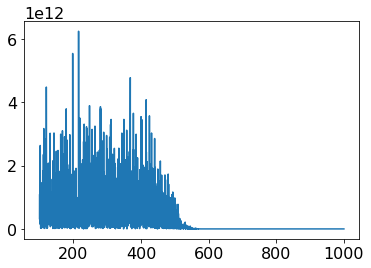

In [110]:
sp = np.fft.fft(rawData)
freq = np.fft.fftfreq(np.size(rawData), 1/31250000)
# plt.plot(freq, sp.real, freq, sp.imag)
PSD = sp.real**2 + sp.imag**2

freq_start = 100e3
freq_end = 1e6

# freq = freq[:int(t.size*0.5)]
# PSD = PSD[:int(t.size*0.5)]
freq_inds = np.where((freq > freq_start) & (freq < freq_end))
freq = freq[freq_inds]
PSD = PSD[freq_inds]

plt.plot(freq/1e3, PSD)
# plt.yscale('log')

axs4[1][0].plot(freq/1e3, PSD)
axs4[1][0].set_xlabel('Frequency (kHz)', fontsize = 22)
axs4[1][0].set_ylabel('PSD ', fontsize = 22)
# axs4[1][0].legend(['(c)'], fontsize = 22)
axs4[1][0].set_title('(c)   ', fontsize = 28, loc='right', y=1.0, pad=-30)

# Set general font size
plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (axs4[1][0].get_xticklabels() + axs4[1][0].get_yticklabels()):
	label.set_fontsize(16)

# Set axis width
for side in axs4[1][0].spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs4[1][0].spines[side].set_linewidth(3)


# Clock period histogram figure

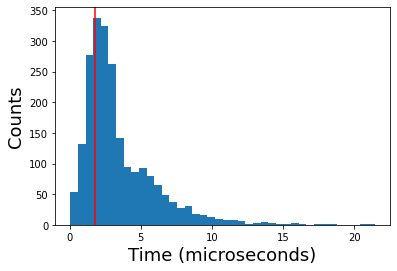

In [10]:
from sqdtoolz.Utilities.FileIO import FileIOReader
import numpy as np
import matplotlib.pyplot as plt

leData = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-18\114646-SS_LTS_Data_cav_detu_600e3\data.h5')
arr = leData.get_numpy_array()

rawData = arr[:,0]+1j*arr[:,1]

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

rawData2 = moving_average(rawData, 30)

# histdata = np.real(np.exp(1j*np.pi*-0.25)*(rawData2+0+150j))
histdata = np.real(rawData2)
histdata = histdata - np.median(histdata)

leClock = np.sign(histdata)
# plt.plot(leClock)
zero_crossings = np.where(np.diff(np.sign(leClock)))[0]
plt.hist(np.diff(zero_crossings)*1/31250000 * 1e6*2, bins=40,alpha=1)
plt.xlabel('Time (microseconds)', fontsize = 18)
plt.ylabel('Counts', fontsize = 18)
plt.axvline(1/560*1000, 0, 200, color='r')


# axs4[1][1].hist(np.diff(zero_crossings)*1/31250000 * 1e6*2, bins=40,alpha=1)
# axs4[1][1].set_xlabel('Time (microseconds)', fontsize = 22)
# axs4[1][1].set_ylabel('Counts', fontsize = 22)
# axs4[1][1].axvline(1.65, 0, 200, color='r')
# # axs4[1][1].legend(['(d)'], fontsize = 22)
# axs4[1][1].set_title('(d)   ', fontsize = 28, loc='right', y=1.0, pad=-30)




# # Set general font size
# plt.rcParams['font.size'] = '16'

# # Set tick font size
# for label in (axs4[1][1].get_xticklabels() + axs4[1][1].get_yticklabels()):
# 	label.set_fontsize(16)

# # Set axis width
# for side in axs4[1][1].spines.keys():  # 'top', 'bottom', 'left', 'right'
#     axs4[1][1].spines[side].set_linewidth(3)




In [112]:
fig4.show()
fig4.savefig('time_trace_analysis.pdf')

<ipython-input-112-ba006ab76860>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


# second time domain data set with half Rabi frequency

In [20]:
leData.param_vals

[array([24]),
 array([0.004]),
 array([    0.        ,  2604.16666667,  5208.33333333, ...,
        -7812.5       , -5208.33333333, -2604.16666667])]

Text(0, 0.5, 'PSD')

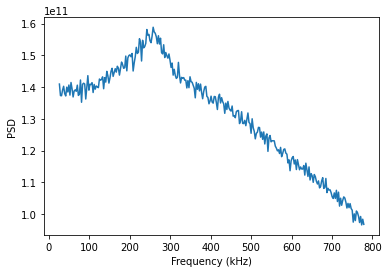

In [5]:
import matplotlib.pyplot as plt

from sqdtoolz.Utilities.FileIO import FileIOReader

leData = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-22\162747-SS_FFT_Data\data.h5')
arr = leData.get_numpy_array()

startInd = 10
endInd = 300
plt.plot(leData.param_vals[2][startInd:endInd]/1e3, arr[0][0][startInd:endInd,0])
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD')

# axs4[0][0].plot(leData.param_vals[2][startInd:endInd]/1e3, arr[3][2][startInd:endInd,0])
# axs4[0][0].set_xlabel('Frequency (kHz)', fontsize = 18)
# axs4[0][0].set_ylabel('PSD', fontsize = 18)

# # Set general font size
# plt.rcParams['font.size'] = '16'

# # Set tick font size
# for label in (axs4[0][0].get_xticklabels() + axs4[0][0].get_yticklabels()):
# 	label.set_fontsize(16)

# # Set axis width
# for side in axs4[0][0].spines.keys():  # 'top', 'bottom', 'left', 'right'
#     axs4[0][0].spines[side].set_linewidth(3)


{'amplitude': 14378444479.350847,
 'width': 66.48002964039966,
 'centre': 255.48913091532918,
 'offset': -1857584774.208908,
 'fig': <Figure size 432x288 with 1 Axes>}

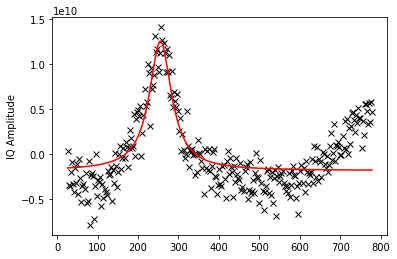

In [6]:
import numpy as np
from sqdtoolz.Utilities.DataFitting import*

cur_proc = arr[0][0][startInd:endInd,0]
freq_vals = leData.param_vals[2][startInd:endInd]/1e3


#Run polynomial subtraction
poly_deg = 2
x_vals = np.arange(cur_proc.size)
p = np.poly1d(np.polyfit(x_vals, cur_proc, poly_deg ))
cur_proc = cur_proc - p(x_vals)
#

#Fit the peak
dfit = DFitPeakLorentzian()
dpkt = dfit.get_fitted_plot(freq_vals, cur_proc, dontplot=False)
freq_val = dpkt['centre'] / 1e3
dpkt

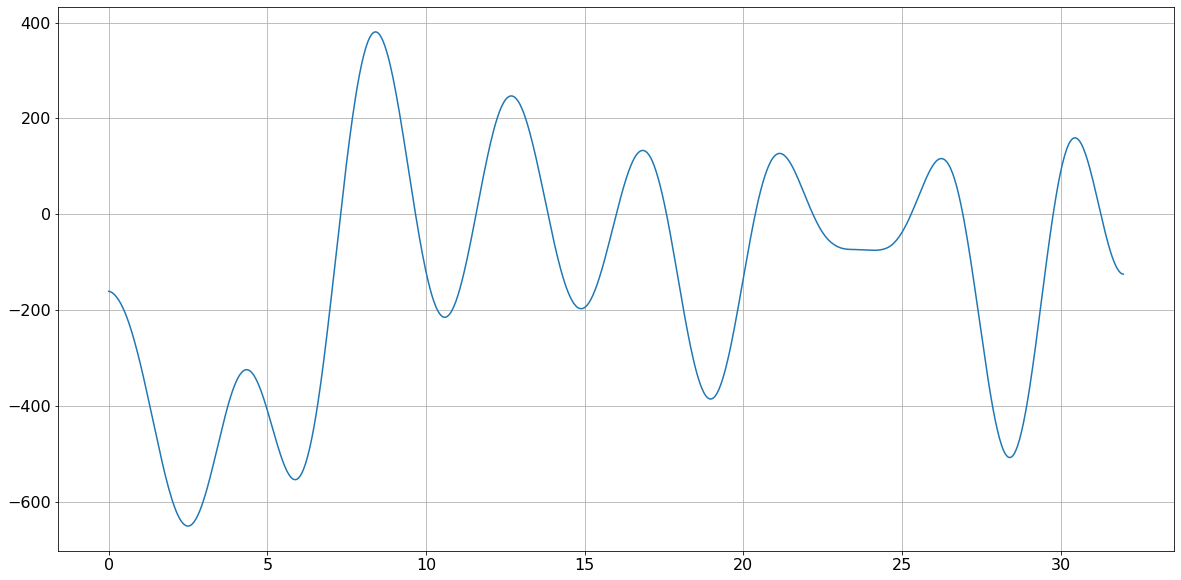

In [23]:
from sqdtoolz.Utilities.FileIO import FileIOReader

leData = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-22\162411-SS_LTS_Data\data.h5')
arr = leData.get_numpy_array()

rawData = arr[:,0]+1j*arr[:,1]
fig, ax = plt.subplots(1)
fig.set_figwidth(20); fig.set_figheight(10)
endInd = 1000
ax.plot(np.arange(rawData[:endInd].size)/31250000 * 1e6, np.real(rawData[:endInd]))
ax.grid()

# axs4[0][1].plot(np.arange(rawData[:endInd].size)/31250000 * 1e6, np.real(rawData[:endInd]))
# axs4[0][1].set_xlabel('Time (micro-second)', fontsize = 18)
# axs4[0][1].set_ylabel('Amplitude ', fontsize = 18)

# # Set general font size
# plt.rcParams['font.size'] = '16'

# # Set tick font size
# for label in (axs4[0][1].get_xticklabels() + axs4[0][1].get_yticklabels()):
# 	label.set_fontsize(16)

# # Set axis width
# for side in axs4[0][1].spines.keys():  # 'top', 'bottom', 'left', 'right'
#     axs4[0][1].spines[side].set_linewidth(3)



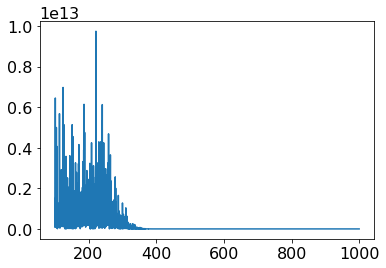

In [24]:
sp = np.fft.fft(rawData)
freq = np.fft.fftfreq(np.size(rawData), 1/31250000)
# plt.plot(freq, sp.real, freq, sp.imag)
PSD = sp.real**2 + sp.imag**2

freq_start = 100e3
freq_end = 1e6

# freq = freq[:int(t.size*0.5)]
# PSD = PSD[:int(t.size*0.5)]
freq_inds = np.where((freq > freq_start) & (freq < freq_end))
freq = freq[freq_inds]
PSD = PSD[freq_inds]

plt.plot(freq/1e3, PSD)
# plt.yscale('log')

# axs4[1][0].plot(freq/1e3, PSD)
# axs4[1][0].set_xlabel('Frequency (kHz)', fontsize = 18)
# axs4[1][0].set_ylabel('PSD ', fontsize = 18)

# # Set general font size
# plt.rcParams['font.size'] = '16'

# # Set tick font size
# for label in (axs4[1][0].get_xticklabels() + axs4[1][0].get_yticklabels()):
# 	label.set_fontsize(16)

# # Set axis width
# for side in axs4[1][0].spines.keys():  # 'top', 'bottom', 'left', 'right'
#     axs4[1][0].spines[side].set_linewidth(3)


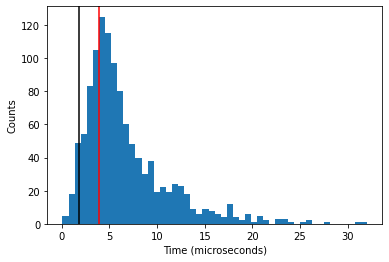

In [11]:
from sqdtoolz.Utilities.FileIO import FileIOReader
import numpy as np
import matplotlib.pyplot as plt

leData = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-22\162411-SS_LTS_Data\data.h5')
arr = leData.get_numpy_array()

rawData = arr[:,0]+1j*arr[:,1]

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

rawData2 = moving_average(rawData, 50)

# histdata = np.real(np.exp(1j*np.pi*-0.25)*(rawData2+0+150j))
histdata = np.real(rawData2)
histdata = histdata - np.median(histdata)

leClock = np.sign(histdata)
# plt.plot(leClock)
zero_crossings = np.where(np.diff(np.sign(leClock)))[0]
plt.hist(np.diff(zero_crossings)*1/31250000 * 1e6*2, bins=50,alpha=1)
plt.xlabel('Time (microseconds)')
plt.ylabel('Counts')
plt.axvline(1/255.5*1000, 0, 200, color='r')
plt.axvline(1/560*1000, 0, 200, color='k')

(array([19.]), array([4., 6.]), <BarContainer object of 1 artists>)

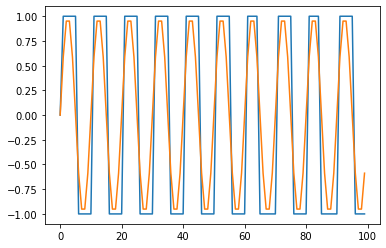

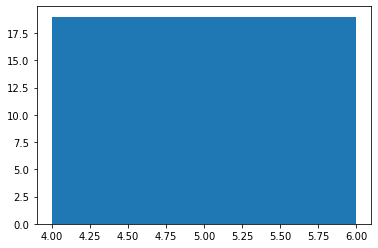

In [18]:
tt = np.arange(0, 100, 1)
bb = np.sin(0.1*2*np.pi*tt)
aa = np.sign(np.sin(0.1*2*np.pi*tt))
plt.figure()
plt.plot(tt, aa, bb)

zero_crossings = np.where(np.diff(aa))[0]
plt.figure()
plt.hist(np.diff(zero_crossings), bins=1,alpha=1)

# clock statistics figure with the two time domain traces

In [16]:
from sqdtoolz.Utilities.FileIO import FileIOReader
import numpy as np
import matplotlib.pyplot as plt

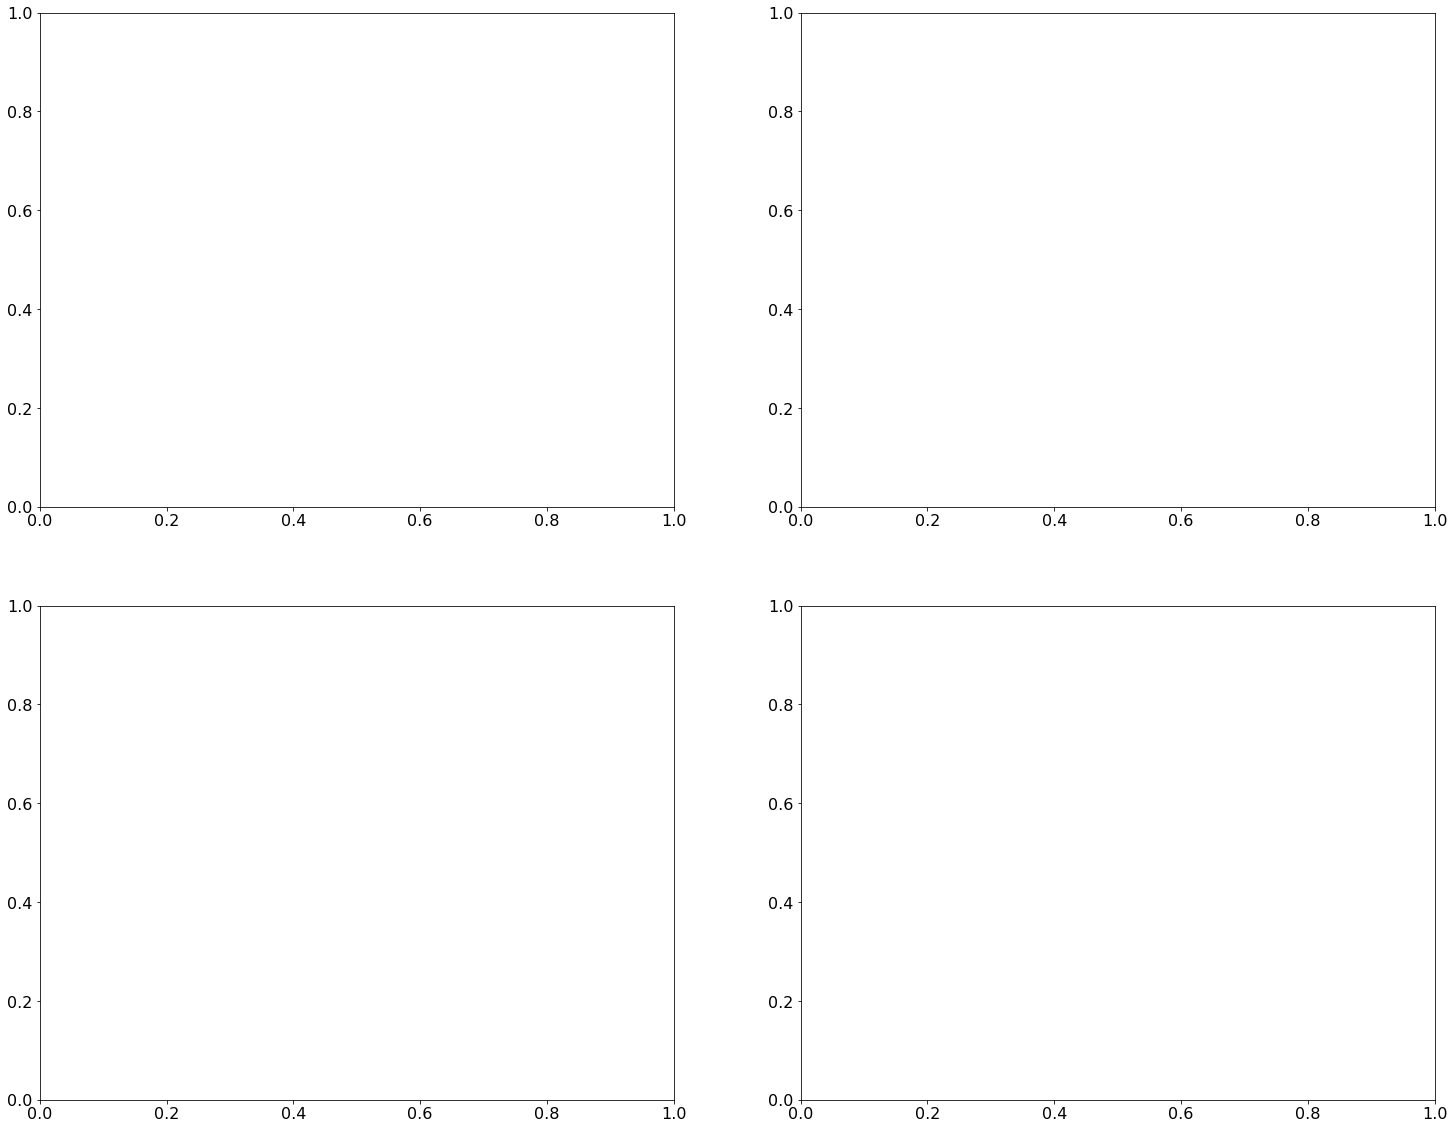

In [17]:
#Prepare subplots
fig4, axs4 = plt.subplots(2, 2)
fig4.set_figwidth(25); fig4.set_figheight(20)

In [18]:
from sqdtoolz.Utilities.FileIO import FileIOReader

leData = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-18\120017-SS_FFT_Data_cav_detu_600e3\data.h5')
arr = leData.get_numpy_array()

In [19]:
import matplotlib.pyplot as plt

startInd = 100
endInd = 300

# plt.plot(leData.param_vals[2][startInd:endInd]/1e3, arr[3][2][startInd:endInd,0])
# plt.xlabel('Frequency (kHz)')
# plt.ylabel('PSD')

axs4[0][0].plot(leData.param_vals[2][startInd:endInd]/1e3, arr[3][2][startInd:endInd,0])
axs4[0][0].set_xlabel('Frequency (kHz)', fontsize = 22)
axs4[0][0].set_ylabel('PSD', fontsize = 22)
# axs4[0][0].legend(['(a)'], fontsize = 22)
axs4[0][0].set_title('(a)   ', fontsize = 28, loc='right', y=1.0, pad=-30)

# Set general font size
plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (axs4[0][0].get_xticklabels() + axs4[0][0].get_yticklabels()):
	label.set_fontsize(16)

# Set axis width
for side in axs4[0][0].spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs4[0][0].spines[side].set_linewidth(3)


In [20]:

leData = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-18\114646-SS_LTS_Data_cav_detu_600e3\data.h5')
arr = leData.get_numpy_array()

rawData = arr[:,0]+1j*arr[:,1]

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

rawData2 = moving_average(rawData, 30)

# histdata = np.real(np.exp(1j*np.pi*-0.25)*(rawData2+0+150j))
histdata = np.real(rawData2)
histdata = histdata - np.median(histdata)

leClock = np.sign(histdata)
# plt.plot(leClock)
zero_crossings = np.where(np.diff(np.sign(leClock)))[0]

# plt.hist(np.diff(zero_crossings)*1/31250000 * 1e6*2, bins=40,alpha=1)
# plt.xlabel('Time (microseconds)', fontsize = 18)
# plt.ylabel('Counts', fontsize = 18)
# plt.axvline(1.65, 0, 200, color='r')


axs4[0][1].hist(np.diff(zero_crossings)*1/31250000 * 1e6*2, bins=40,alpha=1)
axs4[0][1].set_xlabel('Time (microseconds)', fontsize = 22)
axs4[0][1].set_ylabel('Counts', fontsize = 22)
axs4[0][1].axvline(1.65, 0, 200, color='r')
# axs4[1][1].legend(['(d)'], fontsize = 22)
axs4[0][1].set_title('(b)   ', fontsize = 28, loc='right', y=1.0, pad=-30)




# Set general font size
plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (axs4[0][1].get_xticklabels() + axs4[0][1].get_yticklabels()):
	label.set_fontsize(16)

# Set axis width
for side in axs4[0][1].spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs4[0][1].spines[side].set_linewidth(3)




In [21]:
import matplotlib.pyplot as plt

from sqdtoolz.Utilities.FileIO import FileIOReader

leData = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-22\162747-SS_FFT_Data\data.h5')
arr = leData.get_numpy_array()

startInd = 10
endInd = 300

# plt.plot(leData.param_vals[2][startInd:endInd]/1e3, arr[0][0][startInd:endInd,0])
# plt.xlabel('Frequency (kHz)')
# plt.ylabel('PSD')

axs4[1][0].plot(leData.param_vals[2][startInd:endInd]/1e3, arr[0][0][startInd:endInd,0])
axs4[1][0].set_xlabel('Frequency (kHz)', fontsize = 22)
axs4[1][0].set_ylabel('PSD', fontsize = 22)
# axs4[0][0].legend(['(a)'], fontsize = 22)
axs4[1][0].set_title('(c)   ', fontsize = 28, loc='right', y=1.0, pad=-30)

# Set general font size
plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (axs4[1][0].get_xticklabels() + axs4[1][0].get_yticklabels()):
	label.set_fontsize(16)

# Set axis width
for side in axs4[1][0].spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs4[1][0].spines[side].set_linewidth(3)

In [22]:
from sqdtoolz.Utilities.FileIO import FileIOReader
import numpy as np
import matplotlib.pyplot as plt

leData = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-22\162411-SS_LTS_Data\data.h5')
arr = leData.get_numpy_array()

rawData = arr[:,0]+1j*arr[:,1]

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

rawData2 = moving_average(rawData, 50)

# histdata = np.real(np.exp(1j*np.pi*-0.25)*(rawData2+0+150j))
histdata = np.real(rawData2)
histdata = histdata - np.median(histdata)

leClock = np.sign(histdata)
# plt.plot(leClock)
zero_crossings = np.where(np.diff(np.sign(leClock)))[0]

# plt.hist(np.diff(zero_crossings)*1/31250000 * 1e6*2, bins=50,alpha=1)
# plt.xlabel('Time (microseconds)')
# plt.ylabel('Counts')
# plt.axvline(3.9, 0, 200, color='r')
# plt.axvline(1.65, 0, 200, color='k')


axs4[1][1].hist(np.diff(zero_crossings)*1/31250000 * 1e6*2, bins=40,alpha=1)
axs4[1][1].set_xlabel('Time (microseconds)', fontsize = 22)
axs4[1][1].set_ylabel('Counts', fontsize = 22)
axs4[1][1].axvline(1.65, 0, 200, color='r')
axs4[1][1].axvline(3.9, 0, 200, color='k')
# axs4[1][1].legend(['(d)'], fontsize = 22)
axs4[1][1].set_title('(d)   ', fontsize = 28, loc='right', y=1.0, pad=-30)




# Set general font size
plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (axs4[1][1].get_xticklabels() + axs4[1][1].get_yticklabels()):
	label.set_fontsize(16)

# Set axis width
for side in axs4[1][1].spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs4[1][1].spines[side].set_linewidth(3)

In [23]:
fig4.show()
fig4.savefig('time_trace_analysis_v2.pdf')

C:\Users\uqxhe3\AppData\Local\Temp/ipykernel_21044/2560394437.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


# Calibration Post-processing

In [45]:
from sqdtoolz.Utilities.FileIO import FileIOReader
cur_data = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-18\223103-SS_FFT_Data\data.h5')

In [192]:
cur_data.param_names

['cav_atten', 'SSWeakReadDriveAmplitude', 'fft_freqency']

In [193]:
arr.shape

(10, 14, 12000, 1)

In [194]:
cur_data.param_vals

[array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
        0.009, 0.01 , 0.011, 0.012, 0.013]),
 array([    0.        ,  2604.16666667,  5208.33333333, ...,
        -7812.5       , -5208.33333333, -2604.16666667])]

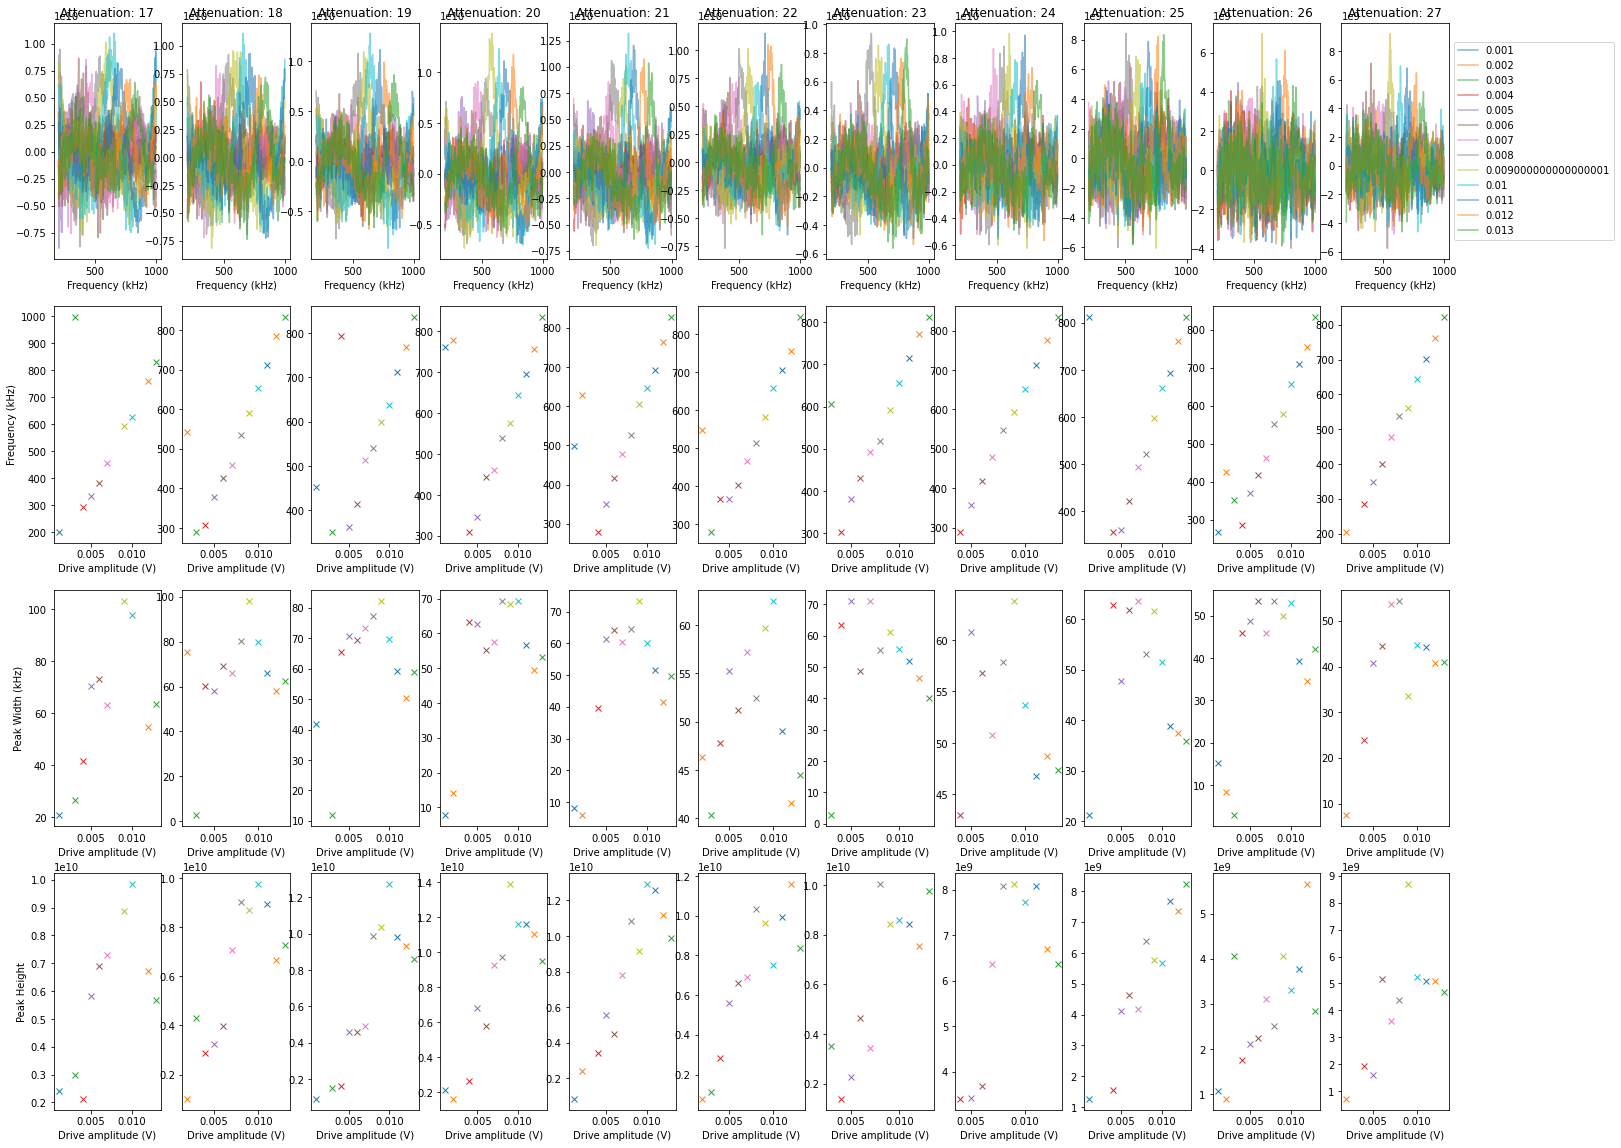

In [46]:
from sqdtoolz.Utilities.DataFitting import DFitPeakLorentzian
import matplotlib.pyplot as plt
import numpy as np

#Extract data and parameters...
arr = cur_data.get_numpy_array()
freq_vals = cur_data.param_vals[2]
drive_amps = cur_data.param_vals[1][1:]

cur_cav_atten_inds = np.arange(cur_data.param_vals[0].size) #[7,8, 9, 10,11,12,14]
freq_range = [200e3,1e6]

peak_freqs = np.zeros([len(cur_cav_atten_inds),len(drive_amps)])


#Prepare subplots
fig, axs = plt.subplots(4, len(cur_cav_atten_inds))
fig.set_figwidth(25); fig.set_figheight(20)

freq_inds = np.where( (freq_vals > freq_range[0]) & (freq_vals < freq_range[1]) )
for m, cur_cav_atten_ind in enumerate(cur_cav_atten_inds):
    cur_peaks = []
    base_trace = arr[cur_cav_atten_ind][0][:,0][freq_inds]
    for ind_tr, cur_trace in enumerate(arr[cur_cav_atten_ind][1:]):
        cur_proc = cur_trace[:,0][freq_inds]
        #Subtract base trace
        cur_proc = cur_proc-base_trace
        #Run polynomial subtraction
        poly_deg = 3
        x_vals = np.arange(cur_proc.size)
        p = np.poly1d(np.polyfit(x_vals, cur_proc, poly_deg ))
        cur_proc = cur_proc - p(x_vals)
        #
        
        #Fit the peak
        dfit = DFitPeakLorentzian()
        try:
            dpkt = dfit.get_fitted_plot(freq_vals[freq_inds], cur_proc, dontplot=True)
            freq_val = dpkt['centre'] / 1e3
            width_val = dpkt['width'] / 1e3
            height_val = dpkt['amplitude']
        except:
            freq_val = np.nan
            width_val = np.nan
            height_val = np.nan
        cur_peaks += [freq_val]

        axs[0][m].plot(freq_vals[freq_inds]/1e3, cur_proc, alpha=0.55)
        axs[1][m].plot(drive_amps[ind_tr], freq_val, 'x')
        axs[2][m].plot(drive_amps[ind_tr], width_val, 'x')
        axs[3][m].plot(drive_amps[ind_tr], height_val, 'x')
        
    # to collect the peak frequencies
    peak_freqs[m][:] = cur_peaks

    axs[0][m].set_title(f'Attenuation: {cur_data.param_vals[0][cur_cav_atten_ind]}')

for m in range(len(cur_cav_atten_inds)):
    axs[0][m].set_xlabel('Frequency (kHz)')
    axs[1][m].set_xlabel('Drive amplitude (V)')
    axs[2][m].set_xlabel('Drive amplitude (V)')
    axs[3][m].set_xlabel('Drive amplitude (V)')
axs[1][0].set_ylabel('Frequency (kHz)')
axs[2][0].set_ylabel('Peak Width (kHz)')
axs[3][0].set_ylabel('Peak Height')
axs[0][-1].legend(drive_amps, loc='center left', bbox_to_anchor=(1, 0.5))

In [48]:
peak_freqs[-4][:]

array([         nan,          nan,          nan, 289.71791769,
       358.66550115, 418.14181233, 480.13667299, 546.98952983,
       594.43367713, 652.61183795, 713.71345779, 777.00594527,
       834.34490808])

[5.98348721e+04 5.79797134e+01]


Text(0, 0.5, 'Peak frequency (kHz)')

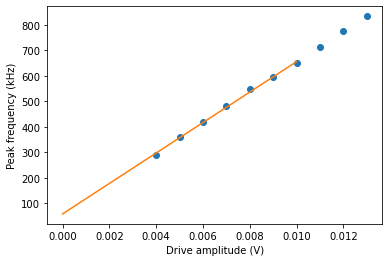

In [49]:
# fitting a line to the peak frequencies vs drive amplitude

zzz = np.polyfit(drive_amps[3:], peak_freqs[-4][3:]  ,1) #normal_ramsey_freqs[:-2])- 
ppp = np.poly1d(zzz)
xpp = np.linspace(0, 0.01, 100)
print(zzz)
plt.plot(drive_amps[3:], peak_freqs[-4][3:] , 'o', xpp, ppp(xpp), '-')
plt.xlabel('Drive amplitude (V)')
plt.ylabel('Peak frequency (kHz)')

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008])

array([[0., 0., 0.],
       [0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

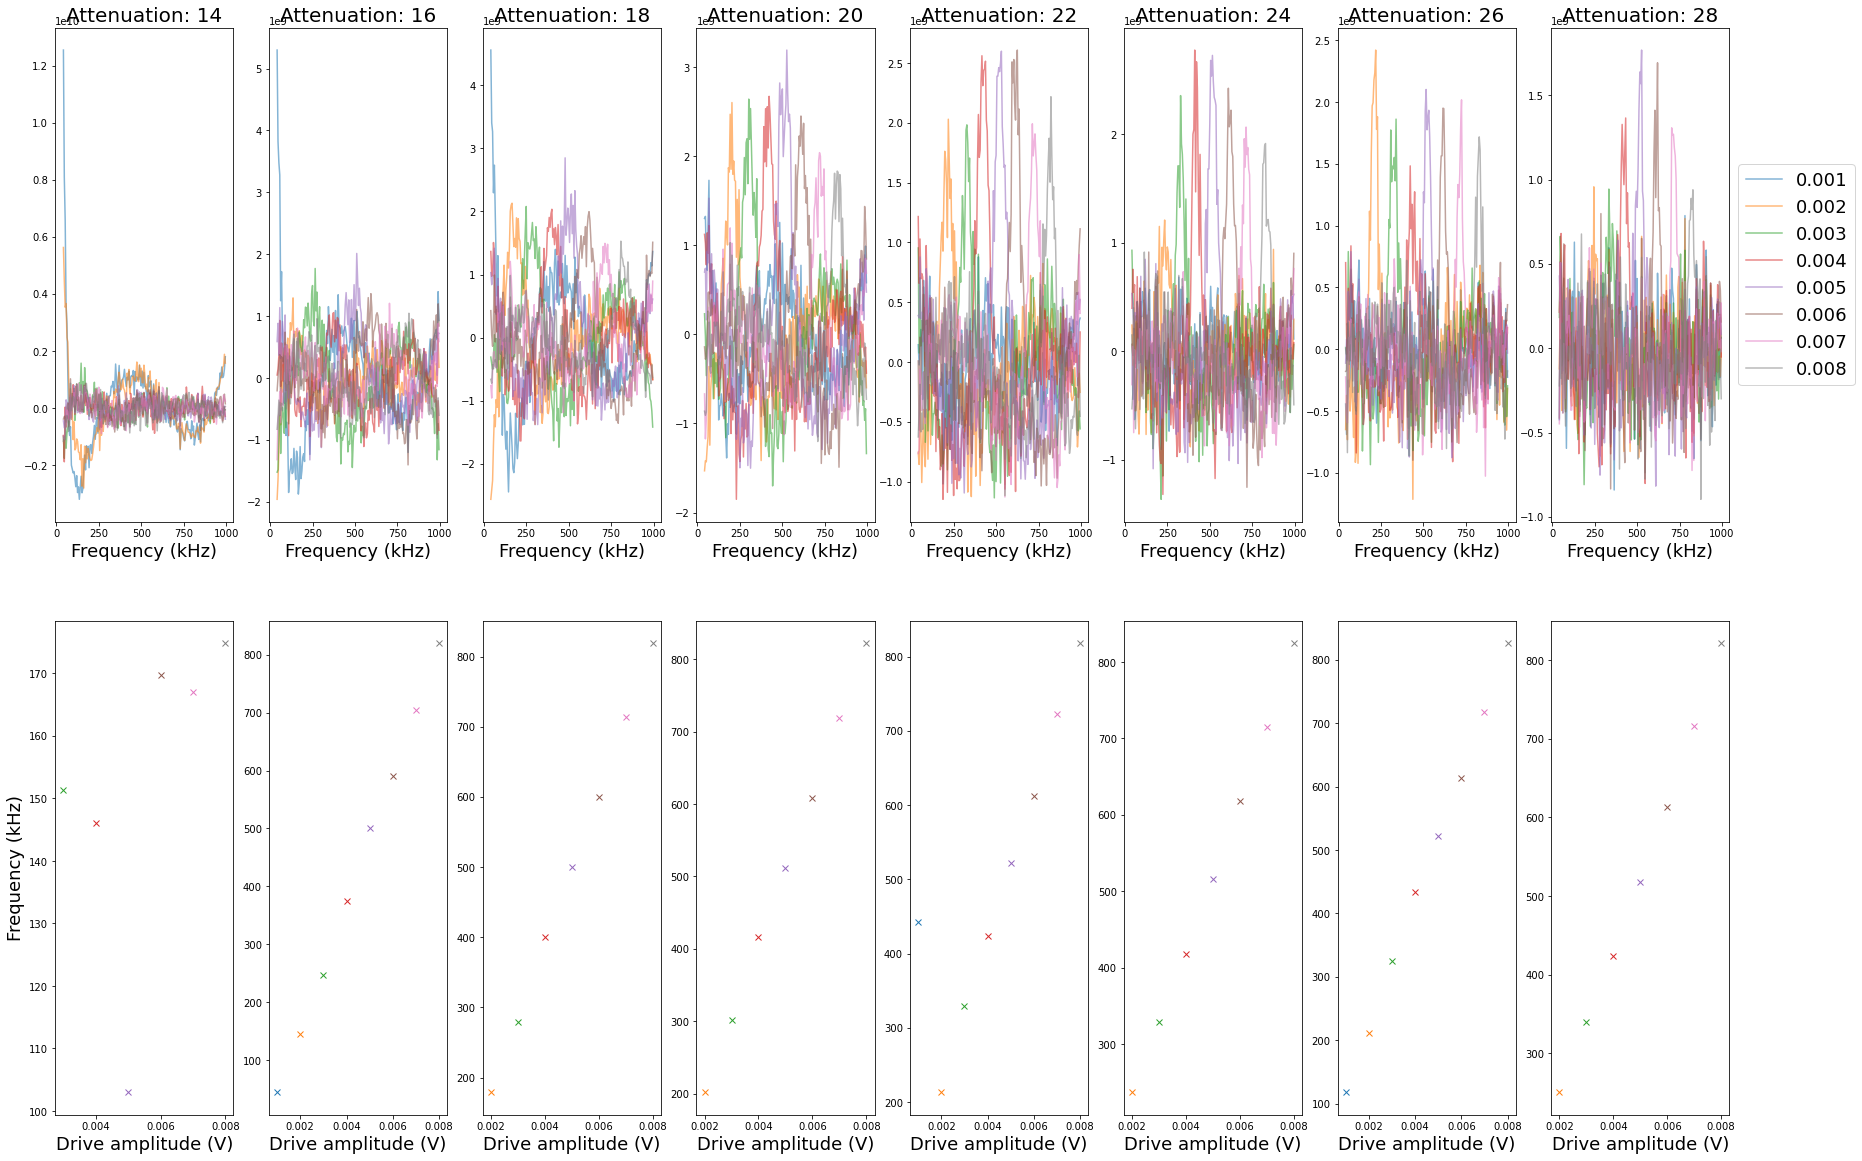

In [40]:
from sqdtoolz.Utilities.FileIO import FileIOReader
cur_data = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-09\183816-SS_FFT_Data\data.h5')

from sqdtoolz.Utilities.DataFitting import DFitPeakLorentzian
import matplotlib.pyplot as plt
import numpy as np

#Extract data and parameters...
arr = cur_data.get_numpy_array()
freq_vals = cur_data.param_vals[2]
drive_amps = cur_data.param_vals[1][1:]


cur_cav_atten_inds = [7,8,9,10,11,12,13,14] #np.arange(cur_data.param_vals[0].size) #[7,8, 9, 10,11,12,14]
freq_range = [40e3,1e6] #[200e3,1e6]


peak_freqs = np.zeros([len(cur_cav_atten_inds),len(drive_amps)])




#Prepare subplots
fig, axs = plt.subplots(2, len(cur_cav_atten_inds))
fig.set_figwidth(30); fig.set_figheight(20)

freq_inds = np.where( (freq_vals > freq_range[0]) & (freq_vals < freq_range[1]) )
for m, cur_cav_atten_ind in enumerate(cur_cav_atten_inds):
    cur_peaks = []
    base_trace = arr[cur_cav_atten_ind][0][:,0][freq_inds]
    for ind_tr, cur_trace in enumerate(arr[cur_cav_atten_ind][1:]):
        cur_proc = cur_trace[:,0][freq_inds]
        #Subtract base trace
        cur_proc = cur_proc-base_trace
        #Run polynomial subtraction
        poly_deg = 3
        x_vals = np.arange(cur_proc.size)
        p = np.poly1d(np.polyfit(x_vals, cur_proc, poly_deg ))
        cur_proc = cur_proc - p(x_vals)
        #
        
        #Fit the peak
        dfit = DFitPeakLorentzian()
        try:
            dpkt = dfit.get_fitted_plot(freq_vals[freq_inds], cur_proc, dontplot=True)
            freq_val = dpkt['centre'] / 1e3
            width_val = dpkt['width'] / 1e3
            height_val = dpkt['amplitude']
        except:
            freq_val = np.nan
            width_val = np.nan
            height_val = np.nan
        cur_peaks += [freq_val]

        axs[0][m].plot(freq_vals[freq_inds]/1e3, cur_proc, alpha=0.55)
        axs[1][m].plot(drive_amps[ind_tr], freq_val, 'x')
#         axs[2][m].plot(drive_amps[ind_tr], width_val, 'x')
#         axs[3][m].plot(drive_amps[ind_tr], height_val, 'x')
        
    # to collect the peak frequencies
    peak_freqs[m][:] = cur_peaks

    axs[0][m].set_title(f'Attenuation: {cur_data.param_vals[0][cur_cav_atten_ind]}', fontsize= 20)

for m in range(len(cur_cav_atten_inds)):
    axs[0][m].set_xlabel('Frequency (kHz)', fontsize= 18)
    axs[1][m].set_xlabel('Drive amplitude (V)' , fontsize=18)
#     axs[2][m].set_xlabel('Drive amplitude (V)')
#     axs[3][m].set_xlabel('Drive amplitude (V)')
axs[1][0].set_ylabel('Frequency (kHz)', fontsize= 18)
# axs[2][0].set_ylabel('Peak Width (kHz)')
# axs[3][0].set_ylabel('Peak Height')
axs[0][-1].legend(drive_amps, loc='center left', bbox_to_anchor=(1, 0.5) , fontsize= 18)



# # Set tick font size
# for label in (ax.get_xticklabels() + ax.get_yticklabels()):
# 	label.set_fontsize(16)

# # Set axis width
# for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
#     ax.spines[side].set_linewidth(3)



In [2]:
fig.savefig('PSDs.pdf')

In [8]:
peak_freqs[-2][:]

array([117.95922131, 211.22127384, 324.67635012, 433.54621817,
       521.96070381, 614.35699708, 717.51604369, 826.31559853])

In [43]:
peak_freqs[-3][:]

array([         nan, 236.91076061, 328.80074761, 417.76046601,
       516.6298629 , 617.73596736, 714.8373024 , 824.85113772])

[9.77096337e+04 3.39555810e+01]


Text(0, 0.5, 'Peak frequency (kHz)')

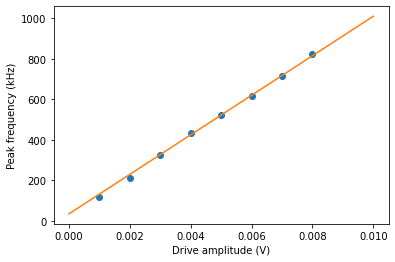

In [44]:
# fitting a line to the peak frequencies vs drive amplitude

zzz = np.polyfit(drive_amps[1:], peak_freqs[-3][1:]  ,1) #normal_ramsey_freqs[:-2])- 
ppp = np.poly1d(zzz)
xpp = np.linspace(0, 0.01, 100)
print(zzz)
plt.plot(drive_amps[:], peak_freqs[-2][:] , 'o', xpp, ppp(xpp), '-')
plt.xlabel('Drive amplitude (V)')
plt.ylabel('Peak frequency (kHz)')

# Analyzing Jumps

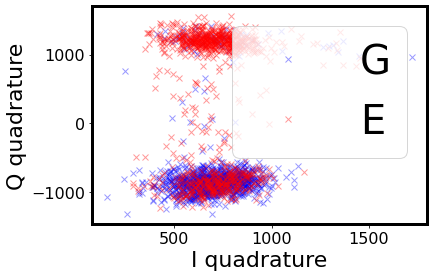

In [173]:
import matplotlib.pyplot as plt
from sqdtoolz.Utilities.FileIO import FileIOReader

leData_blob = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-18\170827-SSblob\data.h5')

arr = leData_blob.get_numpy_array()

g_vals_iq = arr[0][1:,:] #First repetition has bad loading!
e_vals_iq = arr[1][1:,:] #First repetition has bad loading!

mean_g = np.mean(g_vals_iq, axis=0)
mean_e = np.mean(e_vals_iq, axis=0)


arrOrig = arr - mean_g
vecSig = mean_e - mean_g
angleRot = -np.arctan2(vecSig[0], vecSig[1])
rotMat = np.array([[np.cos(angleRot), np.sin(angleRot)],[-np.sin(angleRot), np.cos(angleRot)]])

g_Data = rotMat @ g_vals_iq.T
g_Data = g_Data.T
e_Data = rotMat @ e_vals_iq.T
e_Data = e_Data.T


fig, ax = plt.subplots(1)
ax.set_xlabel('I quadrature', fontsize=22)
ax.set_ylabel('Q quadrature', fontsize = 22)


# ax.plot(g_vals_iq[:,0], g_vals_iq[:,1], 'bx', alpha=0.4)
# ax.plot(e_vals_iq[:,0], e_vals_iq[:,1], 'rx', alpha=0.4)

ax.plot(g_Data[:,0], g_Data[:,1], 'bx', alpha=0.4)
ax.plot(e_Data[:,0], e_Data[:,1], 'rx', alpha=0.4)

# ax.scatter(mean_g[0], mean_g[1], marker='o', color='b', linewidths=5)
# ax.scatter(mean_e[0], mean_e[1], marker='o', color='r', linewidths=4)


# Set general font size
# plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(16)

# Set axis width
for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax.spines[side].set_linewidth(3)


ax.legend(['G', 'E'])

Text(0, 0.5, 'Amplitude (a.u.)')

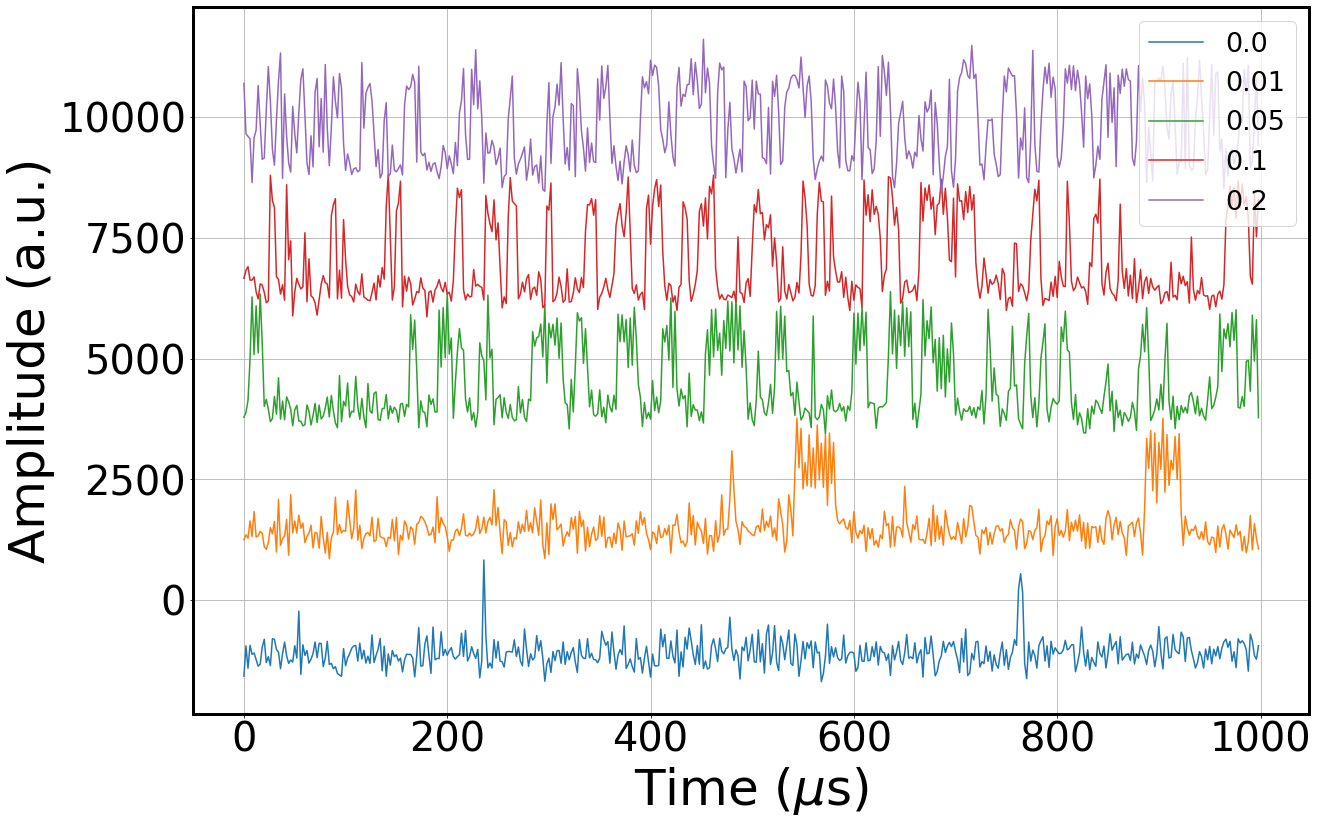

In [176]:
from sqdtoolz.Utilities.FileIO import FileIOReader
import numpy as np
import matplotlib.pyplot as plt

leData_jumps = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-18\171045-SSQuantumjumps_SSQuantumjumps_13dBatten\data.h5')
arrJumps = leData_jumps.get_numpy_array()

t_vals = 5e-6 * np.arange(arrJumps.shape[0])

#SHOULD ROTATE LIKE WITH THE NORMALISATION THING!

num_amps = leData_jumps.param_vals[0].size

fig, ax = plt.subplots(1)
fig.set_figwidth(20)
fig.set_figheight(13)
for m in range(0,num_amps): # [0, num_amps-1]:
    cur_amp = leData_jumps.param_vals[0][m]
    arrJump = rotMat @ arrJumps[m].T

    arrJump = arrJump.T
    pltVals = arrJump[:1000,1] +2500*m
    ax.plot(np.arange(int(pltVals.size/2)) * 2e-6 * 1e6, pltVals[0:int(pltVals.size/2)], alpha=1)
ax.grid()

# Set general font size
# plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(40)

# Set axis width
for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax.spines[side].set_linewidth(3)


ax.set_yticks(2500*np.arange(num_amps));
ax.legend(leData_jumps.param_vals[0], fontsize = 27, loc=1)
ax.set_xlabel('Time ($\mu$s)', fontsize=50)
ax.set_ylabel('Amplitude (a.u.)', fontsize = 50)


In [178]:
fig.savefig('jumps.pdf')
# plt.savefig('jumps.pdf', bbox_inches='tight')

In [2]:
import matplotlib.pyplot as plt
from sqdtoolz.Utilities.FileIO import FileIOReader

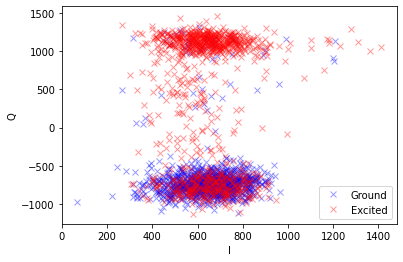

In [76]:
import matplotlib.pyplot as plt
from sqdtoolz.Utilities.FileIO import FileIOReader

leData_blob = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-19\132621-SSblob\data.h5')

arr = leData_blob.get_numpy_array()

g_vals_iq = arr[0][1:,:] #First repetition has bad loading!
e_vals_iq = arr[1][1:,:] #First repetition has bad loading!

mean_g = np.mean(g_vals_iq, axis=0)
mean_e = np.mean(e_vals_iq, axis=0)


arrOrig = arr - mean_g
vecSig = mean_e - mean_g
angleRot = -np.arctan2(vecSig[0], vecSig[1])
rotMat = np.array([[np.cos(angleRot), np.sin(angleRot)],[-np.sin(angleRot), np.cos(angleRot)]])

g_Data = rotMat @ g_vals_iq.T
g_Data = g_Data.T
e_Data = rotMat @ e_vals_iq.T
e_Data = e_Data.T


fig, ax = plt.subplots(1)
ax.set_xlabel('I')
ax.set_ylabel('Q')

# ax.plot(g_vals_iq[:,0], g_vals_iq[:,1], 'bx', alpha=0.4)
# ax.plot(e_vals_iq[:,0], e_vals_iq[:,1], 'rx', alpha=0.4)

ax.plot(g_Data[:,0], g_Data[:,1], 'bx', alpha=0.4)
ax.plot(e_Data[:,0], e_Data[:,1], 'rx', alpha=0.4)

# ax.scatter(mean_g[0], mean_g[1], marker='o', color='b', linewidths=5)
# ax.scatter(mean_e[0], mean_e[1], marker='o', color='r', linewidths=4)

ax.legend(['Ground', 'Excited'])

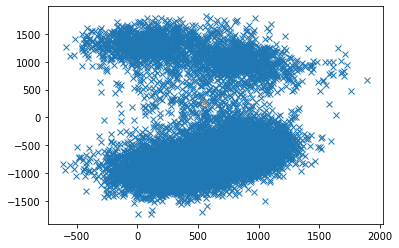

In [6]:
angleRot = 0.3
rotMat = np.array([[np.cos(angleRot), np.sin(angleRot)],[-np.sin(angleRot), np.cos(angleRot)]])

temp_rots = rotMat @ arrJumps[-1][:10000,:].T
temp_rots = temp_rots.T

plt.plot(temp_rots[:,0], temp_rots[:,1], 'x')
plt.plot(np.mean(temp_rots[:,0]), 250, 'x')

In [129]:
leData_jumps.param_vals[0]

array([0.   , 0.005, 0.009, 0.01 , 0.025, 0.05 ])

In [17]:
Driv_amp_calib = np.array([0, 323.5511960887753, 559.8380219679418, 618.9097284377333, 1504.9853254846075, 2981.7779872293977])
print(str(round(Driv_amp_calib[2],2))+'kHz')

559.84kHz


Text(0, 0.5, 'Amplitude (a.u.)')

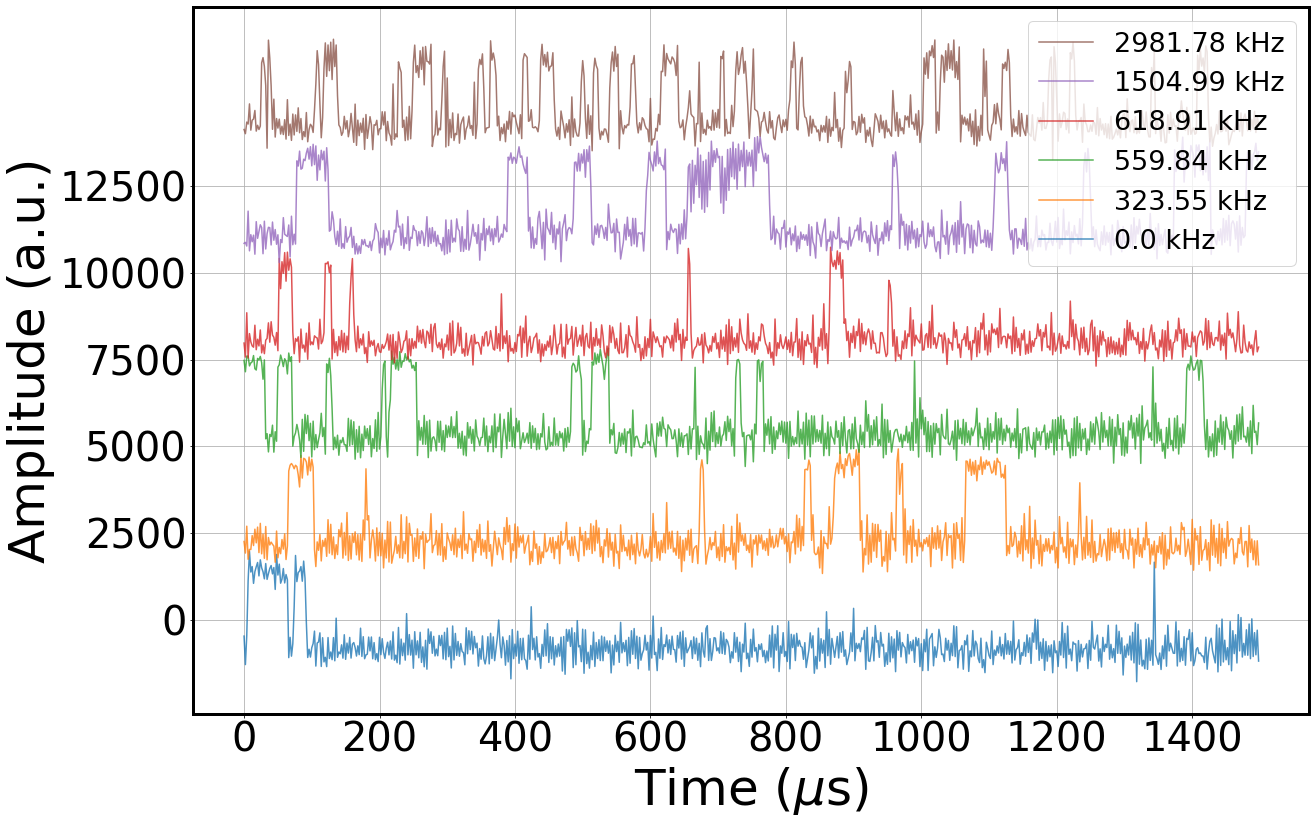

In [24]:
leData_jumps = FileIOReader(r'Z:\Data\20_10_21_Oxford_quantware_arka21.ipynb\2021-11-19\133223-SSQuantumjumps_SSQuantumjumps_13dBatten\data.h5')
arrJumps = leData_jumps.get_numpy_array()

Driv_amp_calib = np.array([0, 323.5511960887753, 559.8380219679418, 618.9097284377333, 1504.9853254846075, 2981.7779872293977])

t_vals = 5e-6 * np.arange(arrJumps.shape[0])

#SHOULD ROTATE LIKE WITH THE NORMALISATION THING!

num_amps = leData_jumps.param_vals[0].size

fig, ax = plt.subplots(1)
fig.set_figwidth(20)
fig.set_figheight(13)
final_vals = []
for m in range(0,num_amps): # [0, num_amps-1]:
    cur_amp = leData_jumps.param_vals[0][m]
    arrJump = rotMat @ arrJumps[m].T

    arrJump = arrJump.T
    pltVals = arrJump[:1500,1]
    ax.plot(np.arange(int(pltVals.size/2)) * 2e-6 * 1e6, pltVals[0:int(pltVals.size/2)] + 3000*m, label= str(round(Driv_amp_calib[m],2))+' kHz', alpha=0.8)
    final_vals += [arrJump[:,1]]

ax.grid()



# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(40)

# Set axis width
for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax.spines[side].set_linewidth(3)

# reordering the labels
# handles, labels = plt.gca().get_legend_handles_labels()
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()

ax.set_yticks(2500*np.arange(num_amps));
ax.legend(handles[::-1], labels[::-1], fontsize = 27, loc=1)
ax.set_xlabel('Time ($\mu$s)', fontsize=50)
ax.set_ylabel('Amplitude (a.u.)', fontsize = 50)

In [26]:
fig.savefig('jumps_data2.pdf')
# plt.savefig('jumps.pdf', bbox_inches='tight')

In [89]:
np.where(arrJumps[0][:10000,1] > 1000)[0].size/10000

0.0551

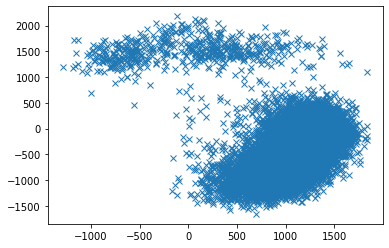

In [65]:
plt.plot(arrJumps[0][:10000,0], arrJumps[0][:10000,1], 'x')

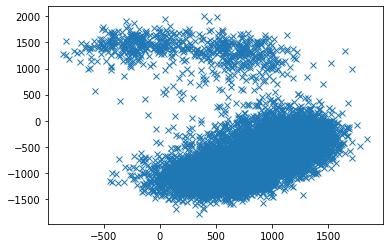

In [66]:
plt.plot(arrJumps[3][:10000,0], arrJumps[3][:10000,1], 'x')

In [ ]:
rotMat @ 

## Final analysis

In [115]:
threshold = 250

ge_vals = []
for m in range(0,num_amps):
    cur_amp = leData_jumps.param_vals[0][m]
    ge_vals += [np.sign(final_vals[m] - threshold)]

(0.0, 50.0)

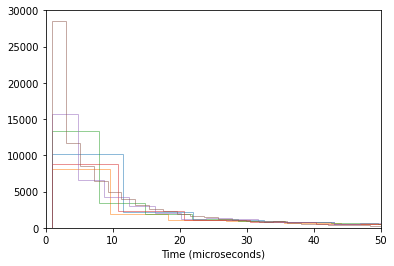

In [116]:
for m in range(0,num_amps):
    cur_amp = leData_jumps.param_vals[0][m]
    zero_crossings = np.where(np.diff(ge_vals[m]))[0]
    plt.hist(np.diff(zero_crossings), bins=100,alpha=0.5, histtype=u'step' )
plt.xlabel('Time (microseconds)')
plt.xlim([0,50])

In [128]:
np.savetxt('jump_data.csv', np.vstack(ge_vals).T.astype(int), fmt='%i', delimiter=',')

# photon number calibration (Stark Shift)

In [135]:
import matplotlib.pyplot as plt

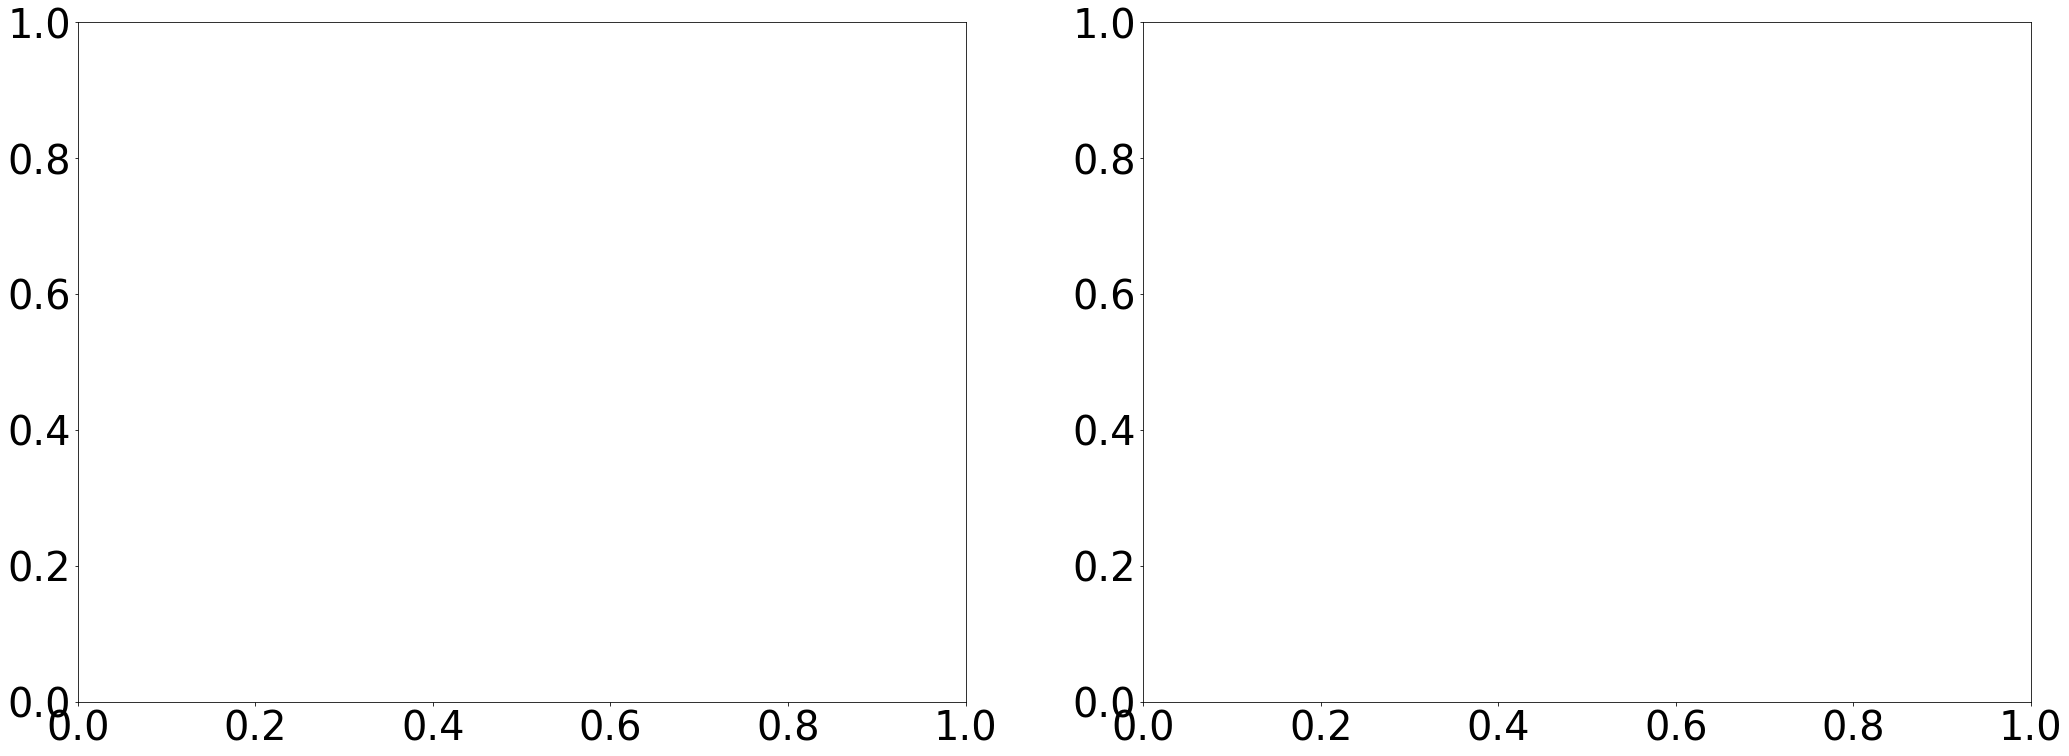

In [136]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(35); fig.set_figheight(12.5)

In [137]:
import numpy as np
import matplotlib.pyplot as plt

ac_stark_drive_powers = np.arange(-47,-42.5,0.5)
raw_vals = {
-47: (107074.3330907384, 835392.1060615227),
-46.5: (120428.81867757998, 852492.9663662829),
-46: (134048.47183161136, 998182.9847335856),
-45.5: (150351.9508324191, 1062728.1842020263),
-45: (159641.21273060888, 1132977.0664939482),
-44.5:(205763.5023322571, 1153061.9382191799),
-44:(230570.13196337782, 1338562.1238070964),
-43.5: (227900.1496194033, 1442524.7851488108),
-43: (248031.5045296168, 1539930.05581566)    
}
ac_stark_freqs = [raw_vals[x][0] for x in ac_stark_drive_powers]
ac_stark_decays = [raw_vals[x][1] for x in ac_stark_drive_powers]

In [138]:
np.concatenate((cavPow_lin[:5],cavPow_lin[7:])) 

array([1.99526231e-05, 2.23872114e-05, 2.51188643e-05, 2.81838293e-05,
       3.16227766e-05, 4.46683592e-05, 5.01187234e-05])

In [139]:
# ac_stark_drive_powers = np.arange(-47,42.5,0.5)
# ac_stark_freqs = np.array([157480.2305133799, 157338.1059623775,  214467.13514360692, 255512.415036818, 318544.3748050723, 355714.83118594065, 383306.554772147, 393752.8078793697, 466974.01943671517, 412764.8974326458, 515257.3138822168, 540849.7978361845, 646732.136607876, 687881.1631030701, 684247.2701830128, 806277.9457278121, 941326.4217448412, 724585.9628723674])
# ac_stark_decays = np.array([1409116.7517745832, 976625.1877808676, 1482294.0680428094, 1681499.5316930634, 1963824.05682297, 2512040.3570398916, 2090671.143665838, 1705961.3879362538, 2183011.691662595,  2724302.696615862, 2480003.724433142, 2670090.3030519206, 2489234.314342671, 3274026.6678011077 , 3117920.9696811256, 3654357.1463760016, 3358851.4728333005 , 3383705.1122598825])

cavPow_lin = 10**(ac_stark_drive_powers/10.0)

zzz = np.polyfit(np.concatenate((cavPow_lin[:5],cavPow_lin[7:])) , np.concatenate((np.array(ac_stark_freqs[:5]), np.array(ac_stark_freqs[7:]))) ,1) #normal_ramsey_freqs[:-2])- 
ppp = np.poly1d(zzz)
xpp = np.linspace(1e-5, 0.00006, 100)
print(zzz)

# fig, ax = plt.subplots(1)
# fig.set_figwidth(20)
# fig.set_figheight(13)

ax[0].grid()

# Set general font size
plt.rcParams['font.size'] = '40'

# Set tick font size
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
	label.set_fontsize(40)

# Set axis width
for side in ax[0].spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax[0].spines[side].set_linewidth(3)

ax[0].plot(cavPow_lin[:], np.array(ac_stark_freqs[:] )/1e3, 'o', markersize=20) 
ax[0].plot(xpp, ppp(xpp)/1e3, '-', linewidth = 5)

# ax.legend(leData_jumps.param_vals[0], loc=1)
ax[0].set_xlabel('Power (mW)', fontsize=50)
ax[0].set_ylabel('Stark shift (kHz)', fontsize = 50)
ax[0].set_title('(a)   ', fontsize = 50, loc='left', y=1.0, pad=-40)



[4.69182756e+09 1.50921329e+04]


Text(0.0, 1.0, '(a)   ')

In [140]:
zz = np.polyfit(cavPow_lin[:], ac_stark_decays[:], 1)
pp = np.poly1d(zz)
xp = np.linspace(1e-5, 0.00006, 100)
print(zz)

# fig, ax = plt.subplots(1)
# fig.set_figwidth(20)
# fig.set_figheight(13)

ax[1].grid()

# Set general font size
plt.rcParams['font.size'] = '40'

# Set tick font size
for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
	label.set_fontsize(40)

# Set axis width
for side in ax[1].spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax[1].spines[side].set_linewidth(3)

ax[1].plot(cavPow_lin[:], np.array(ac_stark_decays[:])/1e6, 'o', markersize=20)
ax[1].plot(xp, pp(xp)/1e6, '-', linewidth = 5)

# ax.legend(leData_jumps.param_vals[0], loc=1)
ax[1].set_xlabel('Power (mW)', fontsize=50)
ax[1].set_ylabel('Dephasing (MHz)', fontsize = 50)
ax[1].set_title('(b)   ', fontsize = 50, loc='left', y=1.0, pad=-40)



[2.38112499e+10 3.63967708e+05]


Text(0.0, 1.0, '(b)   ')

In [171]:
chi = 340e3
kappa = 1.7e6
4.68936369e+09/(2*chi), 2.38112499e+10/(8*(chi)**2/kappa)/(2*np.pi)

(6896.123073529412, 6966.320078642277)

In [172]:
6896/6966

0.9899511915015791

In [142]:
6900*10**(-10/10.0)

690.0

In [143]:
fig.show()
fig.savefig('photo_number_calibration.pdf')

C:\Users\uqxhe3\AppData\Local\Temp/ipykernel_15176/4053534012.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


# 2D Rabi for qubit drive calibration

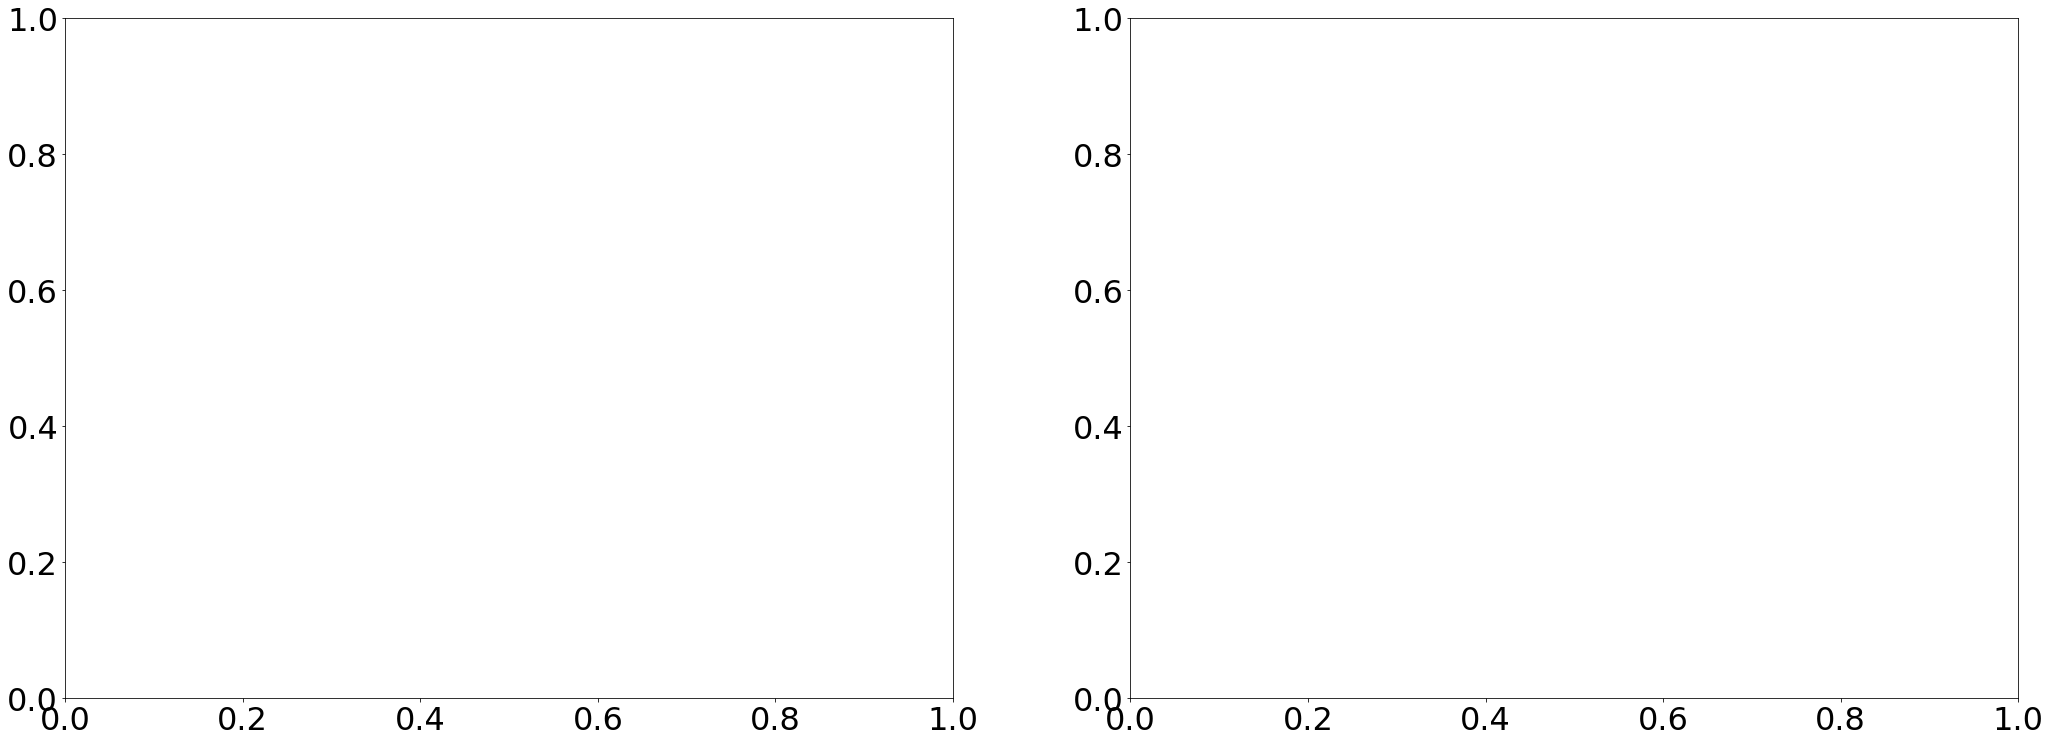

In [154]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(35); fig.set_figheight(12.5)

In [155]:
from sqdtoolz.Utilities.FileIO import FileIOReader

In [156]:
#Z:/Data/20_10_21_Oxford_quantware_arka21.ipynb/2021-12-10/152451-rabi2D_10dB/data.h5
# leData = FileIOReader(r'Z:/Data/20_10_21_Oxford_quantware_arka21.ipynb/2021-11-21/193047-rabi2D_10dB/data.h5')
leData = FileIOReader(r'Z:/Data/20_10_21_Oxford_quantware_arka21.ipynb/2021-12-10/152451-rabi2D_10dB/data.h5')
arr = leData.get_numpy_array()

In [157]:
leData.param_names

['RabiAmplitude', 'RabiTime']

In [158]:
arr.shape

(48, 150, 2)

In [159]:
leData.param_vals[0]

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.02 , 0.03 , 0.04 , 0.05 , 0.06 , 0.07 , 0.08 , 0.09 ,
       0.1  , 0.11 , 0.12 , 0.13 , 0.14 , 0.15 , 0.16 , 0.17 , 0.18 ,
       0.19 , 0.2  , 0.21 , 0.22 , 0.23 , 0.24 , 0.25 , 0.26 , 0.27 ,
       0.28 , 0.29 , 0.3  , 0.31 , 0.32 , 0.33 , 0.34 , 0.35 , 0.36 ,
       0.37 , 0.38 , 0.39 ])

In [160]:
X, Y = np.meshgrid(leData.param_vals[1], leData.param_vals[0]*1000)

Z = arr[:,:,0]**2 + arr[:,:,1]**2

# fig, ax = plt.subplots()
# fig.set_figwidth(10); fig.set_figheight(9)

ax[0].pcolormesh(X, Y, Z)


ax[0].set_ylabel('Drive amplitude (mV)', fontsize=50)
ax[0].set_xlabel('Time (s)', fontsize=50)

ax[0].set_title('      (a)', fontsize = 45, loc='left') #loc='left', y=1.0, pad=-30

# Set general font size
plt.rcParams['font.size'] = '40'

# Set tick font size
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
    label.set_fontsize(40)

# Set axis width
for side in ax[0].spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax[0].spines[side].set_linewidth(3)





In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sqdtoolz.Utilities.FileIO import FileIOReader
from sqdtoolz.Utilities.DataFitting import DFitSinusoid


data_Rabi_2D = FileIOReader(r'Z:/Data/20_10_21_Oxford_quantware_arka21.ipynb/2021-12-10/152451-rabi2D_10dB/data.h5')

arr = data_Rabi_2D.get_numpy_array()

data_all = []
for m, cur_time_trace in enumerate(arr):
    cur_amp = data_Rabi_2D.param_vals[0][m]
    dfit = DFitSinusoid()
    cur_y = np.sqrt( cur_time_trace[:,0]**2+cur_time_trace[:,1]**2 )
    dpkt = dfit.get_fitted_plot(data_Rabi_2D.param_vals[1], cur_y, dontplot=True)
    data_all += [[cur_amp, dpkt['frequency']]]
data_all = np.array(data_all)

line_fit = np.polyfit(data_all[5:-20,0], data_all[5:-20,1], 1)
line_fit = np.poly1d(line_fit)

ax[1].scatter(data_all[:28,0], data_all[:28,1], s = 300, marker = 'o')
ax[1].plot(data_all[:35,0], line_fit(data_all[:35,0]), linewidth = 5, color ='y')

ax[1].set_ylabel('Frequency (Hz)', fontsize=50)
ax[1].set_xlabel('Drive amplitude (mV)', fontsize=50)
ax[1].set_title('      (b)', fontsize = 45, loc='left') #loc='left', y=1.0, pad=-30


# Set general font size
plt.rcParams['font.size'] = '40'

# Set tick font size
for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
    label.set_fontsize(40)

# Set axis width
for side in ax[1].spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax[1].spines[side].set_linewidth(3)


In [162]:
data_all.shape

(48, 2)

In [163]:
fig.show()
fig.savefig('2D_Rabi.pdf')

C:\Users\uqxhe3\AppData\Local\Temp/ipykernel_15176/716376069.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


C:\Users\uqxhe3\AppData\Local\Temp/ipykernel_13988/1862267723.py:96: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


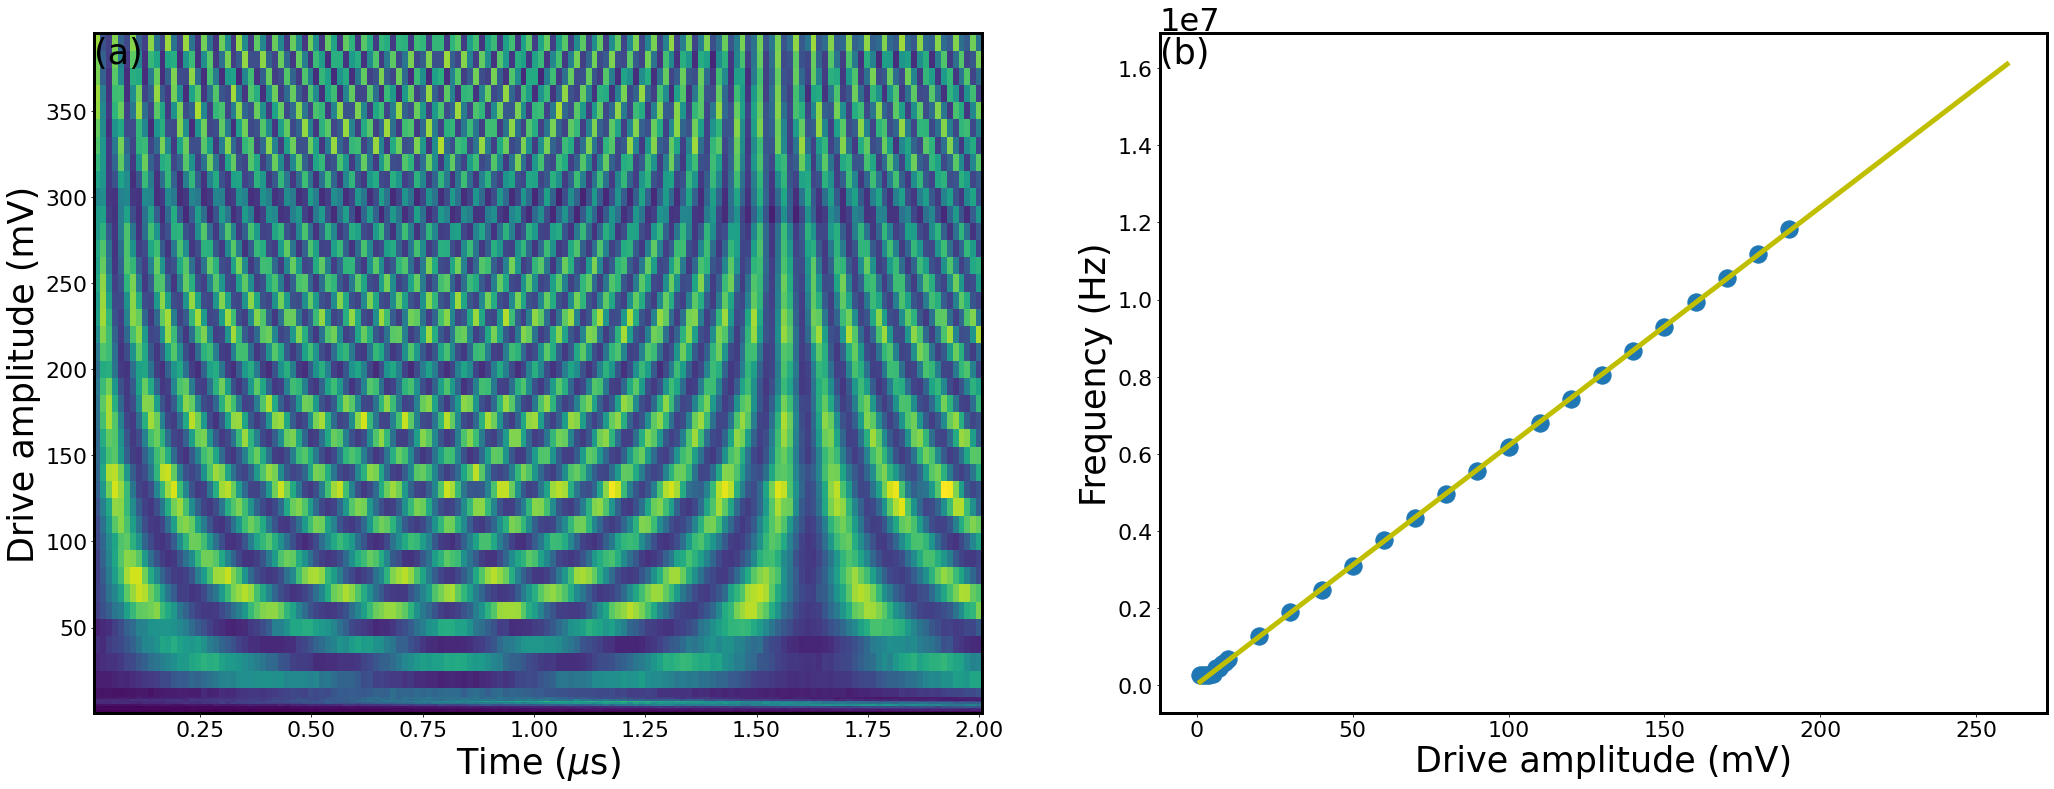

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sqdtoolz.Utilities.FileIO import FileIOReader
from sqdtoolz.Utilities.DataFitting import DFitSinusoid
# 2D Rabi for qubit drive calibration

fig, ax = plt.subplots(1,2)
fig.set_figwidth(35); fig.set_figheight(12.5)



#Z:/Data/20_10_21_Oxford_quantware_arka21.ipynb/2021-12-10/152451-rabi2D_10dB/data.h5
# leData = FileIOReader(r'Z:/Data/20_10_21_Oxford_quantware_arka21.ipynb/2021-11-21/193047-rabi2D_10dB/data.h5')
leData = FileIOReader(r'Z:/Data/20_10_21_Oxford_quantware_arka21.ipynb/2021-12-10/152451-rabi2D_10dB/data.h5')
arr = leData.get_numpy_array()

leData.param_names

arr.shape

leData.param_vals[0]

X, Y = np.meshgrid(leData.param_vals[1]*1e6, leData.param_vals[0]*1000)

Z = arr[:,:,0]**2 + arr[:,:,1]**2

# fig, ax = plt.subplots()
# fig.set_figwidth(10); fig.set_figheight(9)

ax[0].pcolormesh(X, Y, Z)


ax[0].set_ylabel('Drive amplitude (mV)', fontsize=35)
ax[0].set_xlabel('Time ($\mu$s)', fontsize=35)

ax[0].set_title('(a)   ', fontsize = 35, loc='left', y=1.0, pad=-30)

# Set general font size
plt.rcParams['font.size'] = '32'

# Set tick font size
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
    label.set_fontsize(22)

# Set axis width
for side in ax[0].spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax[0].spines[side].set_linewidth(3)





import numpy as np
import matplotlib.pyplot as plt
from sqdtoolz.Utilities.FileIO import FileIOReader
from sqdtoolz.Utilities.DataFitting import DFitSinusoid


data_Rabi_2D = FileIOReader(r'Z:/Data/20_10_21_Oxford_quantware_arka21.ipynb/2021-12-10/152451-rabi2D_10dB/data.h5')

arr = data_Rabi_2D.get_numpy_array()

data_all = []
for m, cur_time_trace in enumerate(arr):
    cur_amp = data_Rabi_2D.param_vals[0][m]
    dfit = DFitSinusoid()
    cur_y = np.sqrt( cur_time_trace[:,0]**2+cur_time_trace[:,1]**2 )
    dpkt = dfit.get_fitted_plot(data_Rabi_2D.param_vals[1], cur_y, dontplot=True)
    data_all += [[cur_amp, dpkt['frequency']]]
data_all = np.array(data_all)

line_fit = np.polyfit(data_all[5:-20,0], data_all[5:-20,1], 1)
line_fit = np.poly1d(line_fit)

ax[1].scatter(data_all[:28,0]*1e3, data_all[:28,1], s = 300, marker = 'o')
ax[1].plot(data_all[:35,0]*1e3, line_fit(data_all[:35,0]), linewidth = 5, color ='y')

ax[1].set_ylabel('Frequency (Hz)', fontsize=35)
ax[1].set_xlabel('Drive amplitude (mV)', fontsize=35)
ax[1].set_title('(b)   ', fontsize = 35, loc='left', y=1.0, pad=-30)

# Set general font size
plt.rcParams['font.size'] = '32'

# Set tick font size
for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
    label.set_fontsize(22)

# Set axis width
for side in ax[1].spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax[1].spines[side].set_linewidth(3)


data_all.shape

fig.show()
fig.savefig('2D_Rabi.pdf')

In [166]:
np.pi/255.5e3*10e6

122.95861657885688